For the project several features can be used to find which city would be better choice. For now, the number of restaurants are observed using the foursquare api.

In [0]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

import folium # plotting library


In [2]:
!apt install gdal-bin

#!pip install git+https://github.com/python-visualization/folium
!pip install geojson-utils
!pip install geopandas
!pip install folium

import altair as alt
import folium, json
from folium import FeatureGroup, LayerControl
from folium.plugins import MarkerCluster,CirclePattern
import geopandas as gpd
import pandas as pd
import numpy as np

Reading package lists... Done
Building dependency tree       
Reading state information... Done
gdal-bin is already the newest version (2.2.3+dfsg-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 43 not upgraded.
  Created wheel for geojson-utils: filename=geojson_utils-0.0.2-cp36-none-any.whl size=11500 sha256=c22ce46852ab0ba2ad16d6140bf37eae8cc6915809ac20a0562780a8399a1824
  Stored in directory: /root/.cache/pip/wheels/2e/aa/0c/49bc837935a4294b687119db336caaec8ba5481bd664cfbbe7
Successfully built geojson-utils
     |████████████████████████████████| 931kB 2.8MB/s 
     |████████████████████████████████| 10.9MB 14.1MB/s 
     |████████████████████████████████| 14.7MB 307kB/s 


In [0]:
CLIENT_ID = 'enter data' # your Foursquare ID
CLIENT_SECRET = 'enter data' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 100

In [0]:
from sklearn.cluster import KMeans 
import sklearn.datasets

In [0]:
address = 'Anchorage, AK'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

In [77]:
search_query = 'restaurant'
radius = 1000
print(search_query + ' .... OK!')

restaurant .... OK!


In [78]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=R2R0YSHO1JOFIT4RQWSCDAC4HR541Z3ARP5BHVZ1TOI3Z0HL&client_secret=JHAYMIJGHRY4EE2PRGCYLJZKSLITDYORUZWHBYTT13MWII51&ll=61.2163129,-149.8948523&v=20180604&query=restaurant&radius=1000&limit=100'

In [79]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5ee84a74d72a4a1a20690735'},
 'response': {'venues': [{'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/japanese_',
       'suffix': '.png'},
      'id': '4bf58dd8d48988d111941735',
      'name': 'Japanese Restaurant',
      'pluralName': 'Japanese Restaurants',
      'primary': True,
      'shortName': 'Japanese'}],
    'delivery': {'id': '1778968',
     'provider': {'icon': {'name': '/delivery_provider_grubhub_20180129.png',
       'prefix': 'https://fastly.4sqi.net/img/general/cap/',
       'sizes': [40, 50]},
      'name': 'grubhub'},
     'url': 'https://www.grubhub.com/restaurant/yamaya-seafood-restaurant-825-west-6th-avenue-anchorage/1778968?affiliate=1131&utm_source=foursquare-affiliate-network&utm_medium=affiliate&utm_campaign=1131&utm_content=1778968'},
    'hasPerk': False,
    'id': '4d2d4aacaa5c6ea8aa21ac04',
    'location': {'address': '825 W 6th Ave',
     'cc': 'US',
     'city': 'Anchorage',
     'count

In [80]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """


,id,name,categories,referralId,hasPerk,location.address,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.city,location.state,location.country,location.formattedAddress,delivery.id,delivery.url,delivery.provider.name,delivery.provider.icon.prefix,delivery.provider.icon.sizes,delivery.provider.icon.name,location.crossStreet,venuePage.id
0,4d2d4aacaa5c6ea8aa21ac04,Yamaya Seafood Restaurant,"[{'id': '4bf58dd8d48988d111941735', 'name': 'J...",v-1592281827,False,825 W 6th Ave,61.216783,-149.898650,"[{'label': 'display', 'lat': 61.21678299999999...",210,99501,US,Anchorage,AK,United States,"[825 W 6th Ave, Anchorage, AK 99501, United St...",1778968,https://www.grubhub.com/restaurant/yamaya-seaf...,grubhub,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",/delivery_provider_grubhub_20180129.png,NaN,NaN
1,5663b338498e7b59771e5725,Pangaea Restaurant and Lounge,"[{'id': '4bf58dd8d48988d1c4941735', 'name': 'R...",v-1592281827,False,508 W 6th Ave,61.216479,-149.891934,"[{'label': 'display', 'lat': 61.21647856874819...",157,99501,US,Anchorage,AK,United States,"[508 W 6th Ave, Anchorage, AK 99501, United St...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4f9ab1d7d4f2465542bc6541,Humpy's Great Alaskan Alehouse,"[{'id': '4bf58dd8d48988d116941735', 'name': 'B...",v-1592281827,False,610 W 6th Ave,61.216427,-149.894146,"[{'label': 'display', 'lat': 61.21642651223455...",39,99501,US,Anchorage,AK,United States,"[610 W 6th Ave (btwn F & G St), Anchorage, AK ...",NaN,NaN,NaN,NaN,NaN,NaN,btwn F & G St,32753896
3,4f3226c219836c91c7bb37f5,Ginza Restaurant,"[{'id': '4d4b7105d754a06374d81259', 'name': 'F...",v-1592281827,False,712 W 4th Ave,61.218266,-149.896179,"[{'label': 'display', 'lat': 61.21826553344726...",228,99501,US,Anchorage,AK,United States,"[712 W 4th Ave, Anchorage, AK 99501, United St...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4f4390e819834bc91f5792e0,Cilantros Mexican Restaurant,"[{'id': '4bf58dd8d48988d1c1941735', 'name': 'M...",v-1592281827,False,611 W 9th Ave,61.213905,-149.894089,"[{'label': 'display', 'lat': 61.21390533447265...",271,99501,US,Anchorage,AK,United States,"[611 W 9th Ave, Anchorage, AK 99501, United St...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

,name,categories,address,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,crossStreet,id
0,Yamaya Seafood Restaurant,Japanese Restaurant,825 W 6th Ave,61.216783,-149.898650,"[{'label': 'display', 'lat': 61.21678299999999...",210,99501,US,Anchorage,AK,United States,"[825 W 6th Ave, Anchorage, AK 99501, United St...",NaN,4d2d4aacaa5c6ea8aa21ac04
1,Pangaea Restaurant and Lounge,Restaurant,508 W 6th Ave,61.216479,-149.891934,"[{'label': 'display', 'lat': 61.21647856874819...",157,99501,US,Anchorage,AK,United States,"[508 W 6th Ave, Anchorage, AK 99501, United St...",NaN,5663b338498e7b59771e5725
2,Humpy's Great Alaskan Alehouse,Bar,610 W 6th Ave,61.216427,-149.894146,"[{'label': 'display', 'lat': 61.21642651223455...",39,99501,US,Anchorage,AK,United States,"[610 W 6th Ave (btwn F & G St), Anchorage, AK ...",btwn F & G St,4f9ab1d7d4f2465542bc6541
3,Ginza Restaurant,Food,712 W 4th Ave,61.218266,-149.896179,"[{'label': 'display', 'lat': 61.21826553344726...",228,99501,US,Anchorage,AK,United States,"[712 W 4th Ave, Anchorage, AK 99501, United St...",NaN,4f3226c219836c91c7bb37f5
4,Cilantros Mexican Restaurant,Mexican Restaurant,611 W 9th Ave,61.213905,-149.894089,"[{'label': 'display', 'lat': 61.21390533447265...",271,99501,US,Anchorage,AK,United States,"[611 W 9th Ave, Anchorage, AK 99501, United St...",NaN,4f4390e819834bc91f5792e0
5,Kaze Restaurant,Japanese Restaurant,930 W 5th Ave,61.217281,-149.900211,"[{'label': 'display', 'lat': 61.21728100000001...",306,99501,US,Anchorage,AK,United States,"[930 W 5th Ave, Anchorage, AK 99501, United St...",NaN,4f44fef619836ed0019800fb
6,The Hungry Bear Restaurant,Asian Restaurant,401 I St,61.218537,-149.899772,"[{'label': 'display', 'lat': 61.218537, 'lng':...",361,99501,US,Anchorage,AK,United States,"[401 I St, Anchorage, AK 99501, United States]",NaN,53b58c0d498e71163730a7c5
7,Thai Curry Restaurant,Thai Restaurant,411 W 4th Ave,61.218838,-149.889923,"[{'label': 'display', 'lat': 61.21883773803711...",385,99501,US,Anchorage,AK,United States,"[411 W 4th Ave, Anchorage, AK 99501, United St...",NaN,4c267a1ba852c92854bde66c
8,Bootlegger's Cove Restaurant,Food,1200 L St,61.210186,-149.902679,"[{'label': 'display', 'lat': 61.21018600463867...",800,NaN,US,Anchorage,AK,United States,"[1200 L St, Anchorage, AK, United States]",NaN,4f442bd019836ed00192adb2
9,Hacienda Restaurant,Mexican Restaurant,312 E 4th Ave,61.218215,-149.878583,"[{'label': 'display', 'lat': 61.218215, 'lng':...",897,99501,US,Anchorage,AK,United States,"[312 E 4th Ave, Anchorage, AK 99501, United St...",NaN,556489ef498e2f28863bec82


In [82]:
dataframe_filtered.name

0            Yamaya Seafood Restaurant
1        Pangaea Restaurant and Lounge
2       Humpy's Great Alaskan Alehouse
3                     Ginza Restaurant
4         Cilantros Mexican Restaurant
5                      Kaze Restaurant
6           The Hungry Bear Restaurant
7                Thai Curry Restaurant
8         Bootlegger's Cove Restaurant
9                  Hacienda Restaurant
10               Restaurants Unlimited
11    Simon & Seafort's Saloon & Grill
12          Crush Wine Bistro & Cellar
13                         Crow's Nest
14                            Kumagoro
15                      Bridge Seafood
16                           La Cabaña
17                Jade Steak & Seafood
Name: name, dtype: object

In [83]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around the Conrad Hotel

# add the restaurants as blue circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

In [0]:
anchorage_grouped=dataframe_filtered.groupby('address').mean().reset_index()

In [87]:
# set number of clusters
kclusters = 5

anchorage_grouped_clustering = anchorage_grouped.drop('address', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(anchorage_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 1, 1, 0, 1, 0, 0, 2, 4, 0], dtype=int32)

In [0]:
import matplotlib.cm as cm
import matplotlib.colors as colors

In [0]:
anchorage_grouped.insert(0, 'Cluster Labels', kmeans.labels_)


In [90]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(anchorage_grouped['lat'], anchorage_grouped['lng'], anchorage_grouped['address'], anchorage_grouped['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [91]:
anchorage_grouped.loc[anchorage_grouped['Cluster Labels'] == 0, anchorage_grouped.columns[[1] + list(range(5, anchorage_grouped.shape[1]))]]

,address
3,343 W 6th Ave
5,401 I St
6,411 W 4th Ave
9,533 W 4th Ave
11,611 W 9th Ave
14,930 W 5th Ave
15,939 W 5th Ave


In [92]:
anchorage_grouped.loc[anchorage_grouped['Cluster Labels'] == 1, anchorage_grouped.columns[[1] + list(range(5, anchorage_grouped.shape[1]))]]

,address
0,1200 L St
1,221 Ship Creek Ave
2,312 E 4th Ave
4,401 E 6th Ave


In [93]:
anchorage_grouped.loc[anchorage_grouped['Cluster Labels'] == 2, anchorage_grouped.columns[[1] + list(range(5, anchorage_grouped.shape[1]))]]

,address
7,420 L St


In [94]:
anchorage_grouped.loc[anchorage_grouped['Cluster Labels'] == 3, anchorage_grouped.columns[[1] + list(range(5, anchorage_grouped.shape[1]))]]

,address
10,610 W 6th Ave


In [95]:
anchorage_grouped.loc[anchorage_grouped['Cluster Labels'] == 4, anchorage_grouped.columns[[1] + list(range(5, anchorage_grouped.shape[1]))]]

,address
8,508 W 6th Ave
12,712 W 4th Ave
13,825 W 6th Ave


In [0]:
address = 'Missoula, MT'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

In [97]:
search_query = 'restaurant'
radius = 1000
print(search_query + ' .... OK!')

restaurant .... OK!


In [98]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=R2R0YSHO1JOFIT4RQWSCDAC4HR541Z3ARP5BHVZ1TOI3Z0HL&client_secret=JHAYMIJGHRY4EE2PRGCYLJZKSLITDYORUZWHBYTT13MWII51&ll=46.8701049,-113.9952672&v=20180604&query=restaurant&radius=1000&limit=100'

In [99]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5ee848c68e17c565012cc911'},
 'response': {'venues': [{'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/thai_',
       'suffix': '.png'},
      'id': '4bf58dd8d48988d149941735',
      'name': 'Thai Restaurant',
      'pluralName': 'Thai Restaurants',
      'primary': True,
      'shortName': 'Thai'}],
    'hasPerk': False,
    'id': '4b463a1ff964a520b01a26e3',
    'location': {'address': '221 W Broadway St',
     'cc': 'US',
     'city': 'Missoula',
     'country': 'United States',
     'distance': 302,
     'formattedAddress': ['221 W Broadway St',
      'Missoula, MT 59802',
      'United States'],
     'labeledLatLngs': [{'label': 'display',
       'lat': 46.872679815239415,
       'lng': -113.99654161989295}],
     'lat': 46.872679815239415,
     'lng': -113.99654161989295,
     'neighborhood': 'Heart of Missoula',
     'postalCode': '59802',
     'state': 'MT'},
    'name': 'Sa Wad Dee Authentic Thai Restaurant',
 

In [100]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """


,id,name,categories,referralId,hasPerk,location.address,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.neighborhood,location.city,location.state,location.country,location.formattedAddress,location.crossStreet,delivery.id,delivery.url,delivery.provider.name,delivery.provider.icon.prefix,delivery.provider.icon.sizes,delivery.provider.icon.name
0,4b463a1ff964a520b01a26e3,Sa Wad Dee Authentic Thai Restaurant,"[{'id': '4bf58dd8d48988d149941735', 'name': 'T...",v-1592281852,False,221 W Broadway St,46.872680,-113.996542,"[{'label': 'display', 'lat': 46.87267981523941...",302,59802,US,Heart of Missoula,Missoula,MT,United States,"[221 W Broadway St, Missoula, MT 59802, United...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4b09f969f964a520a32023e3,Press Box Restaurant Casino,"[{'id': '4bf58dd8d48988d11d941735', 'name': 'S...",v-1592281852,False,835 E Broadway St,46.868474,-113.983647,"[{'label': 'display', 'lat': 46.86847381428886...",902,59802,US,NaN,Missoula,MT,United States,"[835 E Broadway St, Missoula, MT 59802, United...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4b0c5081f964a5200a3b23e3,Red Bird,"[{'id': '4bf58dd8d48988d123941735', 'name': 'W...",v-1592281852,False,120 W Front St,46.870384,-113.995490,"[{'label': 'display', 'lat': 46.87038417370668...",35,59802,US,NaN,Missoula,MT,United States,"[120 W Front St, Missoula, MT 59802, United St...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4bd2e8b79854d13ac177fc4d,Riverbend Restaurant,"[{'id': '4bf58dd8d48988d14e941735', 'name': 'A...",v-1592281852,False,200 S Pattee St,46.868210,-113.993799,"[{'label': 'display', 'lat': 46.86821, 'lng': ...",238,59802,US,NaN,Missoula,MT,United States,"[200 S Pattee St (Inside the Holiday Inn), Mis...",Inside the Holiday Inn,NaN,NaN,NaN,NaN,NaN,NaN
4,4b97f638f964a5207c2235e3,Iza Asian Restaurant,"[{'id': '4bf58dd8d48988d142941735', 'name': 'A...",v-1592281852,False,529 S Higgins Ave,46.866277,-113.997565,"[{'label': 'display', 'lat': 46.86627653391201...",460,59801,US,NaN,Missoula,MT,United States,"[529 S Higgins Ave, Missoula, MT 59801, United...",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [101]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

,name,categories,address,lat,lng,labeledLatLngs,distance,postalCode,cc,neighborhood,city,state,country,formattedAddress,crossStreet,id
0,Sa Wad Dee Authentic Thai Restaurant,Thai Restaurant,221 W Broadway St,46.872680,-113.996542,"[{'label': 'display', 'lat': 46.87267981523941...",302,59802,US,Heart of Missoula,Missoula,MT,United States,"[221 W Broadway St, Missoula, MT 59802, United...",NaN,4b463a1ff964a520b01a26e3
1,Press Box Restaurant Casino,Sports Bar,835 E Broadway St,46.868474,-113.983647,"[{'label': 'display', 'lat': 46.86847381428886...",902,59802,US,NaN,Missoula,MT,United States,"[835 E Broadway St, Missoula, MT 59802, United...",NaN,4b09f969f964a520a32023e3
2,Red Bird,Wine Bar,120 W Front St,46.870384,-113.995490,"[{'label': 'display', 'lat': 46.87038417370668...",35,59802,US,NaN,Missoula,MT,United States,"[120 W Front St, Missoula, MT 59802, United St...",NaN,4b0c5081f964a5200a3b23e3
3,Riverbend Restaurant,American Restaurant,200 S Pattee St,46.868210,-113.993799,"[{'label': 'display', 'lat': 46.86821, 'lng': ...",238,59802,US,NaN,Missoula,MT,United States,"[200 S Pattee St (Inside the Holiday Inn), Mis...",Inside the Holiday Inn,4bd2e8b79854d13ac177fc4d
4,Iza Asian Restaurant,Asian Restaurant,529 S Higgins Ave,46.866277,-113.997565,"[{'label': 'display', 'lat': 46.86627653391201...",460,59801,US,NaN,Missoula,MT,United States,"[529 S Higgins Ave, Missoula, MT 59801, United...",NaN,4b97f638f964a5207c2235e3
5,4B's Restaurant,Restaurant,700 E Broadway St,46.869873,-113.985012,"[{'label': 'display', 'lat': 46.869873, 'lng':...",780,59802,US,NaN,Missoula,MT,United States,"[700 E Broadway St, Missoula, MT 59802, United...",NaN,58a36ad68d8e9966c07d07ea
6,Finnegan's Family Restaurant,Diner,700 E Broadway St,46.869892,-113.985092,"[{'label': 'entrance', 'lat': 46.869824, 'lng'...",774,59802,US,NaN,Missoula,MT,United States,"[700 E Broadway St (btw Monroe & Jackson), Mis...",btw Monroe & Jackson,4b0c92e8f964a520823f23e3
7,The Depot,Bar,201 Railroad St W,46.875874,-113.993835,"[{'label': 'display', 'lat': 46.87587424598599...",651,59802,US,NaN,Missoula,MT,United States,"[201 Railroad St W, Missoula, MT 59802, United...",NaN,4b8cb0c5f964a5209ada32e3
8,Vietnam Grill,Vietnamese Restaurant,420 N Higgins Ave,46.873393,-113.993012,"[{'label': 'display', 'lat': 46.87339278076882...",404,59802,US,NaN,Missoula,MT,United States,"[420 N Higgins Ave (@ W Pine St), Missoula, MT...",@ W Pine St,4c3f32f40edd95219eba2b0f
9,ZACC Zootown Arts Community Center,Art Gallery,235 N 1st St W,46.876944,-113.993411,"[{'label': 'display', 'lat': 46.87694422126486...",774,59802,US,NaN,Missoula,MT,United States,"[235 N 1st St W, Missoula, MT 59802, United St...",NaN,4b5f8474f964a52016bf29e3


In [102]:
dataframe_filtered.name

0    Sa Wad Dee Authentic Thai Restaurant
1             Press Box Restaurant Casino
2                                Red Bird
3                    Riverbend Restaurant
4                    Iza Asian Restaurant
5                         4B's Restaurant
6            Finnegan's Family Restaurant
7                               The Depot
8                           Vietnam Grill
9      ZACC Zootown Arts Community Center
Name: name, dtype: object

In [103]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around the Conrad Hotel

# add the restaurants as blue circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

In [0]:
missloua_grouped=dataframe_filtered.groupby('address').mean().reset_index()

In [105]:
# set number of clusters
kclusters = 5

missoula_grouped_clustering = missoula_grouped.drop('address', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(missoula_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([4, 4, 1, 1, 1, 3, 1, 2, 1, 2], dtype=int32)

In [0]:
import matplotlib.cm as cm
import matplotlib.colors as colors

In [0]:
missoula_grouped.insert(0, 'Cluster Labels', kmeans.labels_)


In [108]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(missoula_grouped['lat'], missoula_grouped['lng'], missoula_grouped['address'], missoula_grouped['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [109]:
missoula_grouped.loc[missoula_grouped['Cluster Labels'] == 0, missoula_grouped.columns[[1] + list(range(5, missoula_grouped.shape[1]))]]

,address
10,509 S 5th St W
12,601 W Spruce St Ste K


In [110]:
missoula_grouped.loc[missoula_grouped['Cluster Labels'] == 1, missoula_grouped.columns[[1] + list(range(5, missoula_grouped.shape[1]))]]

,address
2,101 East Broadway Street
3,219 E Main St
4,225 W Broadway St
6,300 W Broadway St Ste 2
8,323 East Front Street


In [111]:
missoula_grouped.loc[missoula_grouped['Cluster Labels'] == 2, missoula_grouped.columns[[1] + list(range(5, missoula_grouped.shape[1]))]]

,address
7,301 W Alder St
9,500 W. Broadway St
11,521 S 2nd St W


In [112]:
missoula_grouped.loc[missoula_grouped['Cluster Labels'] == 3, missoula_grouped.columns[[1] + list(range(5, missoula_grouped.shape[1]))]]

,address
5,228 E Spruce St


In [113]:
missoula_grouped.loc[missoula_grouped['Cluster Labels'] == 4, missoula_grouped.columns[[1] + list(range(5, missoula_grouped.shape[1]))]]

,address
0,1001 E Broadway St
1,1001 S Higgins Ave Ste B2
13,634 Eddy Ave
14,900 N Orange St Ste 102
15,902 N Orange St


The map results show that there are comparatively less number of restaurants in Missoula than in Anchorage. For the other observations some included datasets would be used.

In [114]:
df_anchorage=pd.read_excel('/content/climate-anchorage2.xlsx')
df_anchorage.head()

FileNotFoundError: ignored

In [0]:
df2=pd.read_csv('/content/Income by Location.csv')
df2.head()

In [0]:
from sklearn.cluster import KMeans 
import sklearn.datasets

Now, the 2 important sectors of the cities would be examined using foursquare and clustering for few data would be done

In [0]:
address = 'Anchorage, AK'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

In [55]:
search_query = 'health care'
radius = 1000
print(search_query + ' .... OK!')

health care .... OK!


In [56]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=R2R0YSHO1JOFIT4RQWSCDAC4HR541Z3ARP5BHVZ1TOI3Z0HL&client_secret=JHAYMIJGHRY4EE2PRGCYLJZKSLITDYORUZWHBYTT13MWII51&ll=61.2163129,-149.8948523&v=20180604&query=health care&radius=1000&limit=100'

In [57]:
results1 = requests.get(url).json()
results1

{'meta': {'code': 200, 'requestId': '5ee84a723639536919d6aac1'},
 'response': {'venues': [{'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/default_',
       'suffix': '.png'},
      'id': '4bf58dd8d48988d130941735',
      'name': 'Building',
      'pluralName': 'Buildings',
      'primary': True,
      'shortName': 'Building'}],
    'hasPerk': False,
    'id': '4bfd7efcf7c82d7fe4458e04',
    'location': {'address': '800 Cordova Street',
     'cc': 'US',
     'city': 'Anchorage',
     'country': 'United States',
     'crossStreet': 'at 8th St',
     'distance': 852,
     'formattedAddress': ['800 Cordova Street (at 8th St)',
      'Anchorage, AK 99501',
      'United States'],
     'labeledLatLngs': [{'label': 'display',
       'lat': 61.214330000000004,
       'lng': -149.879487},
      {'label': 'entrance', 'lat': 61.21433, 'lng': -149.879365}],
     'lat': 61.214330000000004,
     'lng': -149.879487,
     'postalCode': '99501',
     'state': 'AK'},

In [58]:
# assign relevant part of JSON to venues
venues = results1['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """


,id,name,categories,referralId,hasPerk,location.address,location.crossStreet,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.city,location.state,location.country,location.formattedAddress,venuePage.id
0,4bfd7efcf7c82d7fe4458e04,Beacon Occupational Health,"[{'id': '4bf58dd8d48988d130941735', 'name': 'B...",v-1592281733,False,800 Cordova Street,at 8th St,61.214330,-149.879487,"[{'label': 'display', 'lat': 61.21433000000000...",852,99501,US,Anchorage,AK,United States,"[800 Cordova Street (at 8th St), Anchorage, AK...",555309549
1,4e662a2a1fc747ca49e0f0ba,Anchorage Homecare and Staffing - Maxim Healt...,"[{'id': '4bf58dd8d48988d124941735', 'name': 'O...",v-1592281733,False,711 H St Ste 100,NaN,61.215024,-149.897010,"[{'label': 'display', 'lat': 61.21502369279651...",184,99501,US,Anchorage,AK,United States,"[711 H St Ste 100, Anchorage, AK 99501, United...",NaN
2,4bd2262e046076b00c5c7371,Jade Acupuncture and Behavioral Health,"[{'id': '52e81612bcbc57f1066b7a3b', 'name': 'A...",v-1592281733,False,626 K St,NaN,61.216027,-149.902003,"[{'label': 'display', 'lat': 61.216027, 'lng':...",384,99501,US,Anchorage,AK,United States,"[626 K St, Anchorage, AK 99501, United States]",NaN
3,5b7bc5635a2c91002c98fedd,All About You Medical Spa & Women's Healthcare...,"[{'id': '4bf58dd8d48988d104941735', 'name': 'M...",v-1592281733,False,629 W 9th Ave,NaN,61.213910,-149.894650,"[{'label': 'display', 'lat': 61.21391, 'lng': ...",267,99501,US,Anchorage,AK,United States,"[629 W 9th Ave, Anchorage, AK 99501, United St...",NaN
4,4bbcdaecf57ba5933356adb9,Department of Health & Human Services,"[{'id': '4bf58dd8d48988d126941735', 'name': 'G...",v-1592281733,False,825 L St,9th Ave.,61.214311,-149.903147,"[{'label': 'display', 'lat': 61.214311, 'lng':...",497,99501,US,Anchorage,AK,United States,"[825 L St (9th Ave.), Anchorage, AK 99501, Uni...",NaN


In [59]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

,name,categories,address,crossStreet,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,id
0,Beacon Occupational Health,Building,800 Cordova Street,at 8th St,61.214330,-149.879487,"[{'label': 'display', 'lat': 61.21433000000000...",852,99501,US,Anchorage,AK,United States,"[800 Cordova Street (at 8th St), Anchorage, AK...",4bfd7efcf7c82d7fe4458e04
1,Anchorage Homecare and Staffing - Maxim Healt...,Office,711 H St Ste 100,NaN,61.215024,-149.897010,"[{'label': 'display', 'lat': 61.21502369279651...",184,99501,US,Anchorage,AK,United States,"[711 H St Ste 100, Anchorage, AK 99501, United...",4e662a2a1fc747ca49e0f0ba
2,Jade Acupuncture and Behavioral Health,Acupuncturist,626 K St,NaN,61.216027,-149.902003,"[{'label': 'display', 'lat': 61.216027, 'lng':...",384,99501,US,Anchorage,AK,United States,"[626 K St, Anchorage, AK 99501, United States]",4bd2262e046076b00c5c7371
3,All About You Medical Spa & Women's Healthcare...,Medical Center,629 W 9th Ave,NaN,61.213910,-149.894650,"[{'label': 'display', 'lat': 61.21391, 'lng': ...",267,99501,US,Anchorage,AK,United States,"[629 W 9th Ave, Anchorage, AK 99501, United St...",5b7bc5635a2c91002c98fedd
4,Department of Health & Human Services,Government Building,825 L St,9th Ave.,61.214311,-149.903147,"[{'label': 'display', 'lat': 61.214311, 'lng':...",497,99501,US,Anchorage,AK,United States,"[825 L St (9th Ave.), Anchorage, AK 99501, Uni...",4bbcdaecf57ba5933356adb9
5,Motive 8 Health Studio,Medical Center,360 K St Ste 101,NaN,61.218837,-149.902022,"[{'label': 'display', 'lat': 61.218837, 'lng':...",476,99501,US,Anchorage,AK,United States,"[360 K St Ste 101, Anchorage, AK 99501, United...",4ce81ddd948f224bd266ee5d
6,Alaska EyeCare Centers,Eye Doctor,1345 W 9th Ave,NaN,61.213836,-149.909214,"[{'label': 'display', 'lat': 61.21383579, 'lng...",817,99501,US,Anchorage,AK,United States,"[1345 W 9th Ave, Anchorage, AK 99501, United S...",4e3c2f2b2271d21e86e4f3cb
7,"Midnight Sun Home Care, Inc",Medical Center,1023 E 6th Ave,NaN,61.217793,-149.879645,"[{'label': 'display', 'lat': 61.21779300000001...",831,99501,US,Anchorage,AK,United States,"[1023 E 6th Ave, Anchorage, AK 99501, United S...",5b169f9d336273002ce4807c
8,Arfie's Doggie Day Care,Pet Store,535 E 6th Ave,NaN,61.217011,-149.874853,"[{'label': 'display', 'lat': 61.21701061651091...",1074,99501,US,Anchorage,AK,United States,"[535 E 6th Ave, Anchorage, AK 99501, United St...",5021c4e4e4b047125583e4f2
9,ACLS - JMA ADVANCED HEALTHCARE EDUCATION ANCHO...,Health & Beauty Service,310 K St Ste 200,NaN,61.219234,-149.902206,"[{'label': 'display', 'lat': 61.21923446655273...",511,99501,US,Anchorage,AK,United States,"[310 K St Ste 200, Anchorage, AK 99501, United...",5d2ddae70f3dbe00239fe691


In [60]:
dataframe_filtered.name

0                           Beacon Occupational Health
1    Anchorage Homecare  and Staffing - Maxim Healt...
2               Jade Acupuncture and Behavioral Health
3    All About You Medical Spa & Women's Healthcare...
4                Department of Health & Human Services
5                               Motive 8 Health Studio
6                               Alaska EyeCare Centers
7                          Midnight Sun Home Care, Inc
8                              Arfie's Doggie Day Care
9    ACLS - JMA ADVANCED HEALTHCARE EDUCATION ANCHO...
Name: name, dtype: object

In [61]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around the Conrad Hotel

# add the restaurants as blue circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

In [0]:
anchorage_grouped=dataframe_filtered.groupby('address').mean().reset_index()

In [0]:
address = 'Anchorage'

geolocator = Nominatim(user_agent="ak_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

In [64]:
# set number of clusters
kclusters = 5

anchorage_grouped_clustering = anchorage_grouped.drop('address', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(anchorage_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 1, 0, 0, 3, 4, 2, 2, 1, 0], dtype=int32)

In [0]:
import matplotlib.cm as cm
import matplotlib.colors as colors

In [0]:
anchorage_grouped.insert(0, 'Cluster Labels', kmeans.labels_)


In [67]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(anchorage_grouped['lat'], anchorage_grouped['lng'], anchorage_grouped['address'], anchorage_grouped['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [68]:
anchorage_grouped.loc[anchorage_grouped['Cluster Labels'] == 0, anchorage_grouped.columns[[1] + list(range(5, anchorage_grouped.shape[1]))]]

,address
2,310 K St Ste 200
3,360 K St Ste 101
9,825 L St


In [69]:
anchorage_grouped.loc[anchorage_grouped['Cluster Labels'] == 1, anchorage_grouped.columns[[1] + list(range(5, anchorage_grouped.shape[1]))]]

,address
0,1023 E 6th Ave
1,1345 W 9th Ave
8,800 Cordova Street


In [70]:
anchorage_grouped.loc[anchorage_grouped['Cluster Labels'] == 2, anchorage_grouped.columns[[1] + list(range(5, anchorage_grouped.shape[1]))]]

,address
6,629 W 9th Ave
7,711 H St Ste 100


In [71]:
anchorage_grouped.loc[anchorage_grouped['Cluster Labels'] == 3, anchorage_grouped.columns[[1] + list(range(5, anchorage_grouped.shape[1]))]]

,address
4,535 E 6th Ave


In [72]:
anchorage_grouped.loc[anchorage_grouped['Cluster Labels'] == 4, anchorage_grouped.columns[[1] + list(range(5, anchorage_grouped.shape[1]))]]

,address
5,626 K St


In [0]:
address = 'Missoula, MT'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

In [122]:
search_query = 'health care'
radius = 1000
print(search_query + ' .... OK!')

health care .... OK!


In [123]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=R2R0YSHO1JOFIT4RQWSCDAC4HR541Z3ARP5BHVZ1TOI3Z0HL&client_secret=JHAYMIJGHRY4EE2PRGCYLJZKSLITDYORUZWHBYTT13MWII51&ll=46.8701049,-113.9952672&v=20180604&query=health care&radius=1000&limit=100'

In [124]:
results1 = requests.get(url).json()
results1

{'meta': {'code': 200, 'requestId': '5ee84c4ab5ee8f217586cb30'},
 'response': {'venues': [{'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/medical_doctorsoffice_',
       'suffix': '.png'},
      'id': '4bf58dd8d48988d177941735',
      'name': "Doctor's Office",
      'pluralName': "Doctor's Offices",
      'primary': True,
      'shortName': "Doctor's Office"}],
    'hasPerk': False,
    'id': '4bfeb744e584c928b81e6d25',
    'location': {'cc': 'US',
     'city': 'Missoula',
     'country': 'United States',
     'distance': 679,
     'formattedAddress': ['Missoula, MT 59802', 'United States'],
     'labeledLatLngs': [{'label': 'display',
       'lat': 46.876155290889486,
       'lng': -113.9963985943798}],
     'lat': 46.876155290889486,
     'lng': -113.9963985943798,
     'postalCode': '59802',
     'state': 'MT'},
    'name': 'Partnership Health Care',
    'referralId': 'v-1592282516'},
   {'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/

In [125]:
# assign relevant part of JSON to venues
venues = results1['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """


,id,name,categories,referralId,hasPerk,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.city,location.state,location.country,location.formattedAddress,location.address,venuePage.id,location.crossStreet
0,4bfeb744e584c928b81e6d25,Partnership Health Care,"[{'id': '4bf58dd8d48988d177941735', 'name': 'D...",v-1592282516,False,46.876155,-113.996399,"[{'label': 'display', 'lat': 46.87615529088948...",679,59802,US,Missoula,MT,United States,"[Missoula, MT 59802, United States]",NaN,NaN,NaN
1,50f59a61e4b0f23328273ad9,Health Service Pharmacy,"[{'id': '4bf58dd8d48988d10f951735', 'name': 'P...",v-1592282516,False,46.863288,-113.987684,"[{'label': 'display', 'lat': 46.863288, 'lng':...",953,59812,US,Missoula,MT,United States,"[634 Eddy Ave, Missoula, MT 59812, United States]",634 Eddy Ave,NaN,NaN
2,56a870e938face0a36ba2e00,Azaleas Home Care Services,"[{'id': '54541900498ea6ccd0202697', 'name': 'H...",v-1592282516,False,46.871708,-113.995836,"[{'label': 'display', 'lat': 46.87170757257647...",183,59802,US,Missoula,MT,United States,"[Missoula, MT 59802, United States]",NaN,NaN,NaN
3,5c912ba36a5950002ce8f3ba,Elevating Health Chiropractic,[],v-1592282516,False,46.871844,-113.993754,"[{'label': 'display', 'lat': 46.8718436, 'lng'...",225,59802,US,Missoula,MT,United States,"[101 East Broadway Street, Missoula, MT 59802,...",101 East Broadway Street,552021631,NaN
4,5037bb6ee4b09fce664931b2,Planned Parenthood - Missoula Health Center,"[{'id': '4bf58dd8d48988d104941735', 'name': 'M...",v-1592282516,False,46.870071,-113.992120,"[{'label': 'display', 'lat': 46.870071, 'lng':...",239,59802,US,Missoula,MT,United States,"[219 E Main St, Missoula, MT 59802, United Sta...",219 E Main St,NaN,NaN


In [126]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

,name,categories,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,address,crossStreet,id
0,Partnership Health Care,Doctor's Office,46.876155,-113.996399,"[{'label': 'display', 'lat': 46.87615529088948...",679,59802,US,Missoula,MT,United States,"[Missoula, MT 59802, United States]",NaN,NaN,4bfeb744e584c928b81e6d25
1,Health Service Pharmacy,Pharmacy,46.863288,-113.987684,"[{'label': 'display', 'lat': 46.863288, 'lng':...",953,59812,US,Missoula,MT,United States,"[634 Eddy Ave, Missoula, MT 59812, United States]",634 Eddy Ave,NaN,50f59a61e4b0f23328273ad9
2,Azaleas Home Care Services,Health & Beauty Service,46.871708,-113.995836,"[{'label': 'display', 'lat': 46.87170757257647...",183,59802,US,Missoula,MT,United States,"[Missoula, MT 59802, United States]",NaN,NaN,56a870e938face0a36ba2e00
3,Elevating Health Chiropractic,None,46.871844,-113.993754,"[{'label': 'display', 'lat': 46.8718436, 'lng'...",225,59802,US,Missoula,MT,United States,"[101 East Broadway Street, Missoula, MT 59802,...",101 East Broadway Street,NaN,5c912ba36a5950002ce8f3ba
4,Planned Parenthood - Missoula Health Center,Medical Center,46.870071,-113.992120,"[{'label': 'display', 'lat': 46.870071, 'lng':...",239,59802,US,Missoula,MT,United States,"[219 E Main St, Missoula, MT 59802, United Sta...",219 E Main St,NaN,5037bb6ee4b09fce664931b2
5,Child Care Resources,Non-Profit,46.872765,-113.993057,"[{'label': 'display', 'lat': 46.87276458740234...",340,59802,US,Missoula,MT,United States,"[Missoula, MT 59802, United States]",NaN,NaN,52dab309498ed495acc3c04d
6,"Brian Foster, PA-C, Community FirstCare",Doctor's Office,46.869362,-113.991915,"[{'label': 'display', 'lat': 46.86936179145317...",268,59802,US,Missoula,MT,United States,"[323 East Front Street, Missoula, MT 59802, Un...",323 East Front Street,NaN,5c9c8981b5cb76002c175733
7,Community FirstCare,Hospital,46.869421,-113.991725,"[{'label': 'display', 'lat': 46.869421, 'lng':...",280,59802,US,Missoula,MT,United States,"[323 East Front Street, Missoula, MT 59802, Un...",323 East Front Street,NaN,5c9c88dba22db7002cd28666
8,"Patrick Davis, PhD",Doctor's Office,46.873064,-113.997229,"[{'label': 'display', 'lat': 46.8730644, 'lng'...",361,59802,US,Missoula,MT,United States,"[300 W Broadway St Ste 2, Missoula, MT 59802, ...",300 W Broadway St Ste 2,NaN,5a7e90b4780eee4c86b05472
9,Mineral Health Products,Food,46.873379,-113.990139,"[{'label': 'display', 'lat': 46.873379, 'lng':...",533,59802,US,Missoula,MT,United States,"[228 E Spruce St, Missoula, MT 59802, United S...",228 E Spruce St,NaN,4f321d7f19836c91c7b76f17


In [127]:
dataframe_filtered.name

0                           Partnership Health Care
1                           Health Service Pharmacy
2                        Azaleas Home Care Services
3                     Elevating Health Chiropractic
4       Planned Parenthood - Missoula Health Center
5                              Child Care Resources
6           Brian Foster, PA-C, Community FirstCare
7                               Community FirstCare
8                                Patrick Davis, PhD
9                           Mineral Health Products
10    Providence Long Term Mobility Care - Missoula
11                                      Womens Care
12                             Carey Law Firm, P.C.
13                                  Alpine Vet Care
14            Providence Palliative Care - Missoula
15              University of montana, curry health
16          Providence Wound Care Center - Missoula
17           Missoula City-County Health Department
18                     Occupational Health Services
19          

In [128]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around the Conrad Hotel

# add the restaurants as blue circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

In [0]:
missoula_grouped=dataframe_filtered.groupby('address').mean().reset_index()

In [0]:
address = 'Missoula'

geolocator = Nominatim(user_agent="mt_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

In [131]:
# set number of clusters
kclusters = 5

missoula_grouped_clustering = missoula_grouped.drop('address', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(missoula_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([4, 4, 1, 1, 1, 3, 1, 2, 1, 2], dtype=int32)

In [0]:
import matplotlib.cm as cm
import matplotlib.colors as colors

In [0]:
missoula_grouped.insert(0, 'Cluster Labels', kmeans.labels_)


In [134]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(missoula_grouped['lat'], missoula_grouped['lng'], missoula_grouped['address'], missoula_grouped['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [135]:
missoula_grouped.loc[missoula_grouped['Cluster Labels'] == 0, missoula_grouped.columns[[1] + list(range(5, missoula_grouped.shape[1]))]]

,address
10,509 S 5th St W
12,601 W Spruce St Ste K


In [136]:
missoula_grouped.loc[missoula_grouped['Cluster Labels'] == 1, missoula_grouped.columns[[1] + list(range(5, missoula_grouped.shape[1]))]]

,address
2,101 East Broadway Street
3,219 E Main St
4,225 W Broadway St
6,300 W Broadway St Ste 2
8,323 East Front Street


In [137]:
missoula_grouped.loc[missoula_grouped['Cluster Labels'] == 2, missoula_grouped.columns[[1] + list(range(5, missoula_grouped.shape[1]))]]

,address
7,301 W Alder St
9,500 W. Broadway St
11,521 S 2nd St W


In [138]:
missoula_grouped.loc[missoula_grouped['Cluster Labels'] == 3, missoula_grouped.columns[[1] + list(range(5, missoula_grouped.shape[1]))]]

,address
5,228 E Spruce St


In [139]:
missoula_grouped.loc[missoula_grouped['Cluster Labels'] == 4, missoula_grouped.columns[[1] + list(range(5, missoula_grouped.shape[1]))]]

,address
0,1001 E Broadway St
1,1001 S Higgins Ave Ste B2
13,634 Eddy Ave
14,900 N Orange St Ste 102
15,902 N Orange St


In [0]:
import pandas

In [0]:
address = 'Anchorage, AK'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

In [147]:
search_query = 'management'
radius = 1000
print(search_query + ' .... OK!')

management .... OK!


In [148]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=R2R0YSHO1JOFIT4RQWSCDAC4HR541Z3ARP5BHVZ1TOI3Z0HL&client_secret=JHAYMIJGHRY4EE2PRGCYLJZKSLITDYORUZWHBYTT13MWII51&ll=61.2163129,-149.8948523&v=20180604&query=management&radius=1000&limit=100'

In [149]:
results1 = requests.get(url).json()
results1

{'meta': {'code': 200, 'requestId': '5ee84cb0885df53364fa9e2b'},
 'response': {'venues': [{'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/default_',
       'suffix': '.png'},
      'id': '4bf58dd8d48988d124941735',
      'name': 'Office',
      'pluralName': 'Offices',
      'primary': True,
      'shortName': 'Office'}],
    'hasPerk': False,
    'id': '4efcd30e823142b92684e1e4',
    'location': {'address': '550 W 7th Ave Ste 130',
     'cc': 'US',
     'city': 'Anchorage',
     'country': 'United States',
     'distance': 135,
     'formattedAddress': ['550 W 7th Ave Ste 130',
      'Anchorage, AK 99501',
      'United States'],
     'labeledLatLngs': [{'label': 'display',
       'lat': 61.21549577871605,
       'lng': -149.8929703833666}],
     'lat': 61.21549577871605,
     'lng': -149.8929703833666,
     'postalCode': '99501',
     'state': 'AK'},
    'name': 'PTP Building Management',
    'referralId': 'v-1592282658'},
   {'categories': [{'ico

In [150]:
# assign relevant part of JSON to venues
venues = results1['response']['venues']

# tranform venues into a dataframe
dataframe = pandas.json_normalize(venues)
dataframe.head()

,id,name,categories,referralId,hasPerk,location.address,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.city,location.state,location.country,location.formattedAddress
0,4efcd30e823142b92684e1e4,PTP Building Management,"[{'id': '4bf58dd8d48988d124941735', 'name': 'O...",v-1592282658,False,550 W 7th Ave Ste 130,61.215496,-149.892970,"[{'label': 'display', 'lat': 61.21549577871605...",135,99501,US,Anchorage,AK,United States,"[550 W 7th Ave Ste 130, Anchorage, AK 99501, U..."
1,4ef40f12f7909b0d2dd22386,Simon Management Office,"[{'id': '4bf58dd8d48988d130941735', 'name': 'B...",v-1592282658,False,5th Ave Mall,61.216643,-149.889296,"[{'label': 'display', 'lat': 61.21664320890102...",300,99501,US,Anchorage,AK,United States,"[5th Ave Mall, Anchorage, AK 99501, United Sta..."
2,5c1be18e121384002c359504,Baer Private Wealth Management,"[{'id': '5453de49498eade8af355881', 'name': 'B...",v-1592282658,False,737 M St,61.214909,-149.905212,"[{'label': 'display', 'lat': 61.21490859985351...",576,99501,US,Anchorage,AK,United States,"[737 M St, Anchorage, AK 99501, United States]"
3,5995de32065ef51988085850,Money Management International,"[{'id': '503287a291d4c4b30a586d65', 'name': 'F...",v-1592282658,False,"707 A Street, Suite 120",61.218296,-149.881129,"[{'label': 'display', 'lat': 61.2182957858348,...",767,99501,US,Anchorage,AK,United States,"[707 A Street, Suite 120, Anchorage, AK 99501,..."


In [154]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

,name,categories,address,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,id
0,PTP Building Management,Office,550 W 7th Ave Ste 130,61.215496,-149.892970,"[{'label': 'display', 'lat': 61.21549577871605...",135,99501,US,Anchorage,AK,United States,"[550 W 7th Ave Ste 130, Anchorage, AK 99501, U...",4efcd30e823142b92684e1e4
1,Simon Management Office,Building,5th Ave Mall,61.216643,-149.889296,"[{'label': 'display', 'lat': 61.21664320890102...",300,99501,US,Anchorage,AK,United States,"[5th Ave Mall, Anchorage, AK 99501, United Sta...",4ef40f12f7909b0d2dd22386
2,Baer Private Wealth Management,Business Service,737 M St,61.214909,-149.905212,"[{'label': 'display', 'lat': 61.21490859985351...",576,99501,US,Anchorage,AK,United States,"[737 M St, Anchorage, AK 99501, United States]",5c1be18e121384002c359504
3,Money Management International,Financial or Legal Service,"707 A Street, Suite 120",61.218296,-149.881129,"[{'label': 'display', 'lat': 61.2182957858348,...",767,99501,US,Anchorage,AK,United States,"[707 A Street, Suite 120, Anchorage, AK 99501,...",5995de32065ef51988085850


In [155]:
dataframe_filtered.name

0           PTP Building Management
1           Simon Management Office
2    Baer Private Wealth Management
3    Money Management International
Name: name, dtype: object

In [156]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around the Conrad Hotel

# add the restaurants as blue circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

In [0]:
address = 'Missoula, MT'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

In [158]:
search_query = 'management'
radius = 1000
print(search_query + ' .... OK!')

management .... OK!


In [159]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=R2R0YSHO1JOFIT4RQWSCDAC4HR541Z3ARP5BHVZ1TOI3Z0HL&client_secret=JHAYMIJGHRY4EE2PRGCYLJZKSLITDYORUZWHBYTT13MWII51&ll=46.8701049,-113.9952672&v=20180604&query=management&radius=1000&limit=100'

In [160]:
results1 = requests.get(url).json()
results1

{'meta': {'code': 200, 'requestId': '5ee84e877a98810d7e01a60d'},
 'response': {'venues': [{'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/financial_',
       'suffix': '.png'},
      'id': '503287a291d4c4b30a586d65',
      'name': 'Financial or Legal Service',
      'pluralName': 'Financial or Legal Services',
      'primary': True,
      'shortName': 'Financial / Legal'}],
    'hasPerk': False,
    'id': '4db605df81543d71da64c1ef',
    'location': {'address': '330 NORTH HIGGINS AVENUE 1st Floor',
     'cc': 'US',
     'city': 'Missoula',
     'country': 'United States',
     'distance': 341,
     'formattedAddress': ['330 NORTH HIGGINS AVENUE 1st Floor',
      'Missoula, MT 59802',
      'United States'],
     'labeledLatLngs': [{'label': 'display',
       'lat': 46.872791,
       'lng': -113.9931058},
      {'label': 'entrance', 'lat': 46.872854, 'lng': -113.99334}],
     'lat': 46.872791,
     'lng': -113.9931058,
     'postalCode': '59802',
     's

In [161]:
# assign relevant part of JSON to venues
venues = results1['response']['venues']

# tranform venues into a dataframe
dataframe = pandas.json_normalize(venues)
dataframe.head()

,id,name,categories,referralId,hasPerk,location.address,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.city,location.state,location.country,location.formattedAddress,location.crossStreet
0,4db605df81543d71da64c1ef,Merrill Lynch Wealth Management Advisor Joe He...,"[{'id': '503287a291d4c4b30a586d65', 'name': 'F...",v-1592282741,False,330 NORTH HIGGINS AVENUE 1st Floor,46.872791,-113.993106,"[{'label': 'display', 'lat': 46.872791, 'lng':...",341,59802,US,Missoula,MT,United States,"[330 NORTH HIGGINS AVENUE 1st Floor, Missoula,...",NaN
1,58d3f02526a407508d11db87,First Interstate Wealth Management - Molly Nelson,"[{'id': '503287a291d4c4b30a586d65', 'name': 'F...",v-1592282741,False,101 E Front St,46.869954,-113.994916,"[{'label': 'display', 'lat': 46.86995448550259...",31,59802,US,Missoula,MT,United States,"[101 E Front St, Missoula, MT 59802, United St...",NaN
2,5dd2ef7814f1330009cabe64,Gimpelson Shappee Wealth Management Group,"[{'id': '503287a291d4c4b30a586d65', 'name': 'F...",v-1592282741,False,"125 Bank Street, Suite 700",46.869199,-113.994550,"[{'label': 'display', 'lat': 46.86919886548299...",114,59802,US,Missoula,MT,United States,"[125 Bank Street, Suite 700, Missoula, MT 5980...",NaN
3,5dc516a7d0309d00086af92b,Rhad Keel - RBC Wealth Management Financial Ad...,"[{'id': '503287a291d4c4b30a586d65', 'name': 'F...",v-1592282741,False,125 Bank St Ste 700,46.869195,-113.994549,"[{'label': 'display', 'lat': 46.86919512167213...",115,59802,US,Missoula,MT,United States,"[125 Bank St Ste 700, Missoula, MT 59802, Unit...",NaN
4,5da945e125495c0008a8ab86,RBC Wealth Management Branch - Missoula,"[{'id': '503287a291d4c4b30a586d65', 'name': 'F...",v-1592282741,False,"125 Bank Street, Suite 700",46.869196,-113.994537,"[{'label': 'display', 'lat': 46.86919636635655...",115,59802,US,Missoula,MT,United States,"[125 Bank Street, Suite 700, Missoula, MT 5980...",NaN


In [162]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

,name,categories,address,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,crossStreet,id
0,Merrill Lynch Wealth Management Advisor Joe He...,Financial or Legal Service,330 NORTH HIGGINS AVENUE 1st Floor,46.872791,-113.993106,"[{'label': 'display', 'lat': 46.872791, 'lng':...",341,59802,US,Missoula,MT,United States,"[330 NORTH HIGGINS AVENUE 1st Floor, Missoula,...",NaN,4db605df81543d71da64c1ef
1,First Interstate Wealth Management - Molly Nelson,Financial or Legal Service,101 E Front St,46.869954,-113.994916,"[{'label': 'display', 'lat': 46.86995448550259...",31,59802,US,Missoula,MT,United States,"[101 E Front St, Missoula, MT 59802, United St...",NaN,58d3f02526a407508d11db87
2,Gimpelson Shappee Wealth Management Group,Financial or Legal Service,"125 Bank Street, Suite 700",46.869199,-113.994550,"[{'label': 'display', 'lat': 46.86919886548299...",114,59802,US,Missoula,MT,United States,"[125 Bank Street, Suite 700, Missoula, MT 5980...",NaN,5dd2ef7814f1330009cabe64
3,Rhad Keel - RBC Wealth Management Financial Ad...,Financial or Legal Service,125 Bank St Ste 700,46.869195,-113.994549,"[{'label': 'display', 'lat': 46.86919512167213...",115,59802,US,Missoula,MT,United States,"[125 Bank St Ste 700, Missoula, MT 59802, Unit...",NaN,5dc516a7d0309d00086af92b
4,RBC Wealth Management Branch - Missoula,Financial or Legal Service,"125 Bank Street, Suite 700",46.869196,-113.994537,"[{'label': 'display', 'lat': 46.86919636635655...",115,59802,US,Missoula,MT,United States,"[125 Bank Street, Suite 700, Missoula, MT 5980...",NaN,5da945e125495c0008a8ab86
5,Kimberly Shappee - RBC Wealth Management Finan...,Financial or Legal Service,"125 Bank Street, Suite 700",46.869196,-113.994516,"[{'label': 'display', 'lat': 46.86919558433958...",116,59802,US,Missoula,MT,United States,"[125 Bank Street, Suite 700, Missoula, MT 5980...",NaN,5dc50d4cd193310007aba67e
6,Gary Kiemele - RBC Wealth Management Financial...,Financial or Legal Service,"125 Bank Street, Suite 700",46.869181,-113.994519,"[{'label': 'display', 'lat': 46.86918122444025...",117,59802,US,Missoula,MT,United States,"[125 Bank Street, Suite 700, Missoula, MT 5980...",NaN,5dc515bee42b4c000750bd98
7,bitterroot property management,None,NaN,46.873600,-113.998900,"[{'label': 'display', 'lat': 46.8736, 'lng': -...",477,59802,US,Missoula,MT,United States,"[Missoula, MT 59802, United States]",NaN,4f5157a8e4b04e2d774bb911
8,Summit Property Management,Real Estate Office,NaN,46.874355,-113.992279,"[{'label': 'display', 'lat': 46.87435531616211...",524,NaN,US,Missoula,MT,United States,"[Missoula, MT, United States]",NaN,521cef2211d26fe32a3ac56a
9,Gatewest Property Management,None,Stephens Center,46.865765,-113.989468,"[{'label': 'display', 'lat': 46.865765, 'lng':...",654,59801,US,Missoula,MT,United States,"[Stephens Center, Missoula, MT 59801, United S...",NaN,4cc0992a67a3b1f76f77c30e


In [163]:
dataframe_filtered.name

0     Merrill Lynch Wealth Management Advisor Joe He...
1     First Interstate Wealth Management - Molly Nelson
2             Gimpelson Shappee Wealth Management Group
3     Rhad Keel - RBC Wealth Management Financial Ad...
4               RBC Wealth Management Branch - Missoula
5     Kimberly Shappee - RBC Wealth Management Finan...
6     Gary Kiemele - RBC Wealth Management Financial...
7                        bitterroot property management
8                            Summit Property Management
9                          Gatewest Property Management
10                      Garden City Property Management
11                           Athletic Injury Management
12                      Copperstone Property Management
13                      Copperstone Property Management
Name: name, dtype: object

In [164]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around the Conrad Hotel

# add the restaurants as blue circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

In [121]:
#Observing household income by location

df1=pd.read_csv('/content/Income by Location.csv')
df1.head()

,ID Year,Year,ID Race,Race,Household Income by Race,Household Income by Race Moe,Geography,ID Geography
0,2017,2017,0,Total,48489,6453.0,"Census Tract 9.02, Anchorage Municipality, AK",14000US02020000902
1,2017,2017,0,Total,103870,19343.0,"Census Tract 29, Anchorage Municipality, AK",14000US02020002900
2,2017,2017,0,Total,107926,11791.0,"Census Tract 1.01, Anchorage Municipality, AK",14000US02020000101
3,2017,2017,0,Total,57833,10014.0,"Census Tract 19, Anchorage Municipality, AK",14000US02020001900
4,2017,2017,0,Total,56146,14606.0,"Census Tract 21, Anchorage Municipality, AK",14000US02020002100


In [144]:
df2=df1['Geography']

df2.head()

0    Census Tract 9.02, Anchorage Municipality, AK
1      Census Tract 29, Anchorage Municipality, AK
2    Census Tract 1.01, Anchorage Municipality, AK
3      Census Tract 19, Anchorage Municipality, AK
4      Census Tract 21, Anchorage Municipality, AK
Name: Geography, dtype: object

Now, the transportation data would be observed

In [164]:
#Commuter transportation data for anchorage
df3=pd.read_excel('/content/a1.xlsx')
df4 = df3[['Group','share']]
df4.head()

,Group,share
0,Worked At Home,0.043789
1,Drove Alone,0.767374
2,Other,0.020715
3,Carpooled,0.112990
4,Walked,0.022325


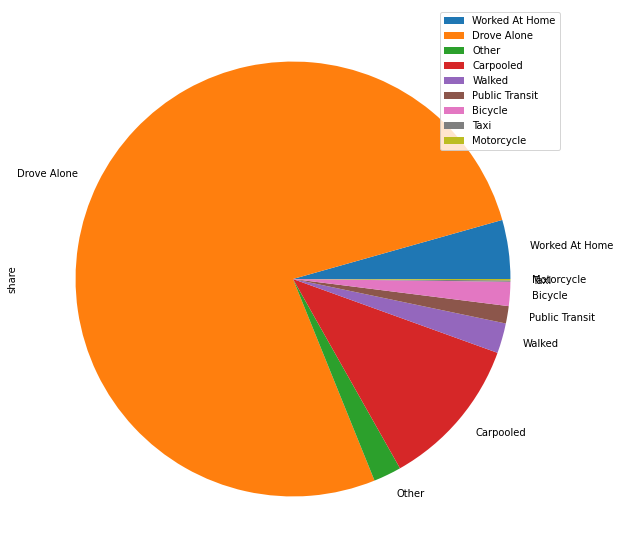

In [183]:
plot = df4.plot.pie(y='share',labels=df4['Group'], figsize=(10, 10))

In [166]:
#Commuter transportation data for missoula
df31=pd.read_excel('/content/m1.xlsx')
df41 = df31[['Group','share']]
df41.head()

,Group,share
0,Public Transit,0.020895
1,Worked At Home,0.059212
2,Drove Alone,0.724737
3,Motorcycle,0.002078
4,Bicycle,0.045016


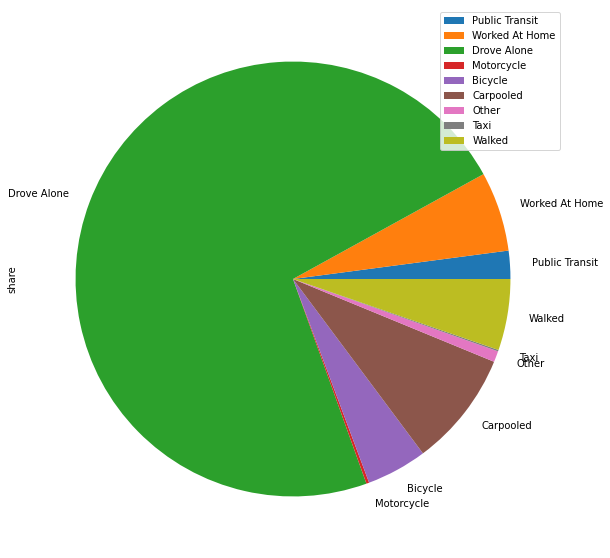

In [180]:
plot = df41.plot.pie(y='share',labels=df41['Group'], figsize=(10, 10))

Now, the health service would be considered

In [169]:
#considering the health service for anchorage
df5=pd.read_excel('/content/health coverage_anchorage.xlsx')
df6 = df5[['Kaiser Coverage','share']]
df6.head()

,Kaiser Coverage,share
0,Uninsured,0.113229
1,Medicaid,0.175315
2,NonGroup,0.134294
3,Medicare,0.056313
4,OtherPublic,0.067686


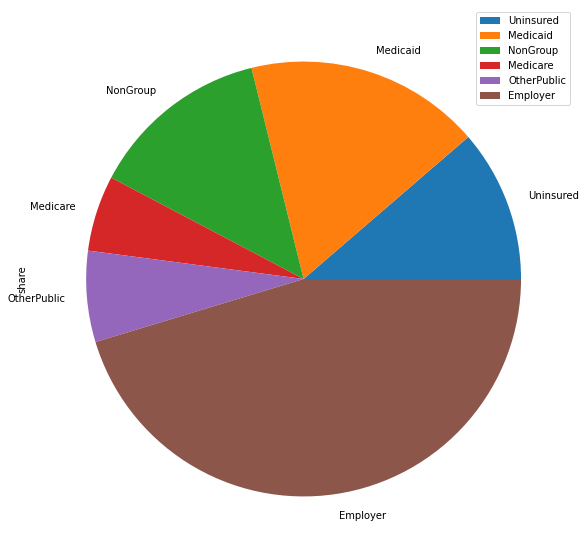

In [186]:
plot = df6.plot.pie(y='share',labels=df6['Kaiser Coverage'], figsize=(10, 10))

In [170]:
#considering the health service for missoula
df51=pd.read_excel('/content/health coverage_missoula.xlsx')
df61 = df51[['Kaiser Coverage','share']]
df61.head()

,Kaiser Coverage,share
0,Uninsured,0.096813
1,Medicaid,0.123217
2,NonGroup,0.167539
3,Medicare,0.105095
4,OtherPublic,0.021228


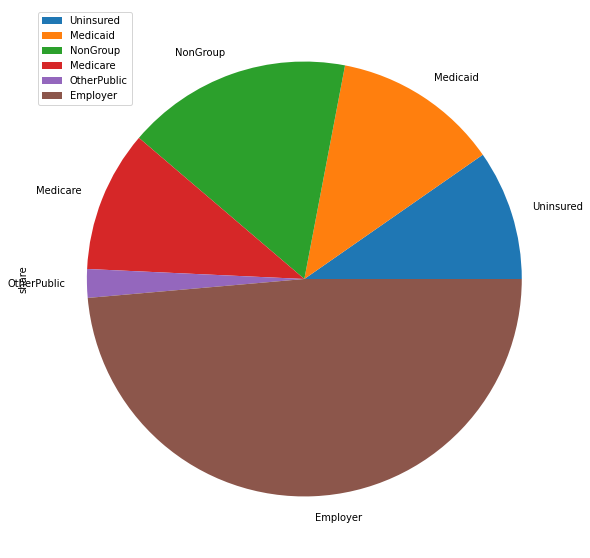

In [171]:
plot = df61.plot.pie(y='share',labels=df61['Kaiser Coverage'], figsize=(10, 10))

In [173]:
#Considering the employment by occupation
df7=pd.read_excel('/content/employmentbyoccupation_anchorage.xlsx')
df8 = df7[['Occupation','Workforce by Occupation and Gender']]
df8.head()

,Occupation,Workforce by Occupation and Gender
0,Office & Administrative Support Occupations,18122
1,Material Moving Occupations,4414
2,Transportation Occupations,7410
3,Business & Financial Operations Occupations,9392
4,Production Occupations,3482


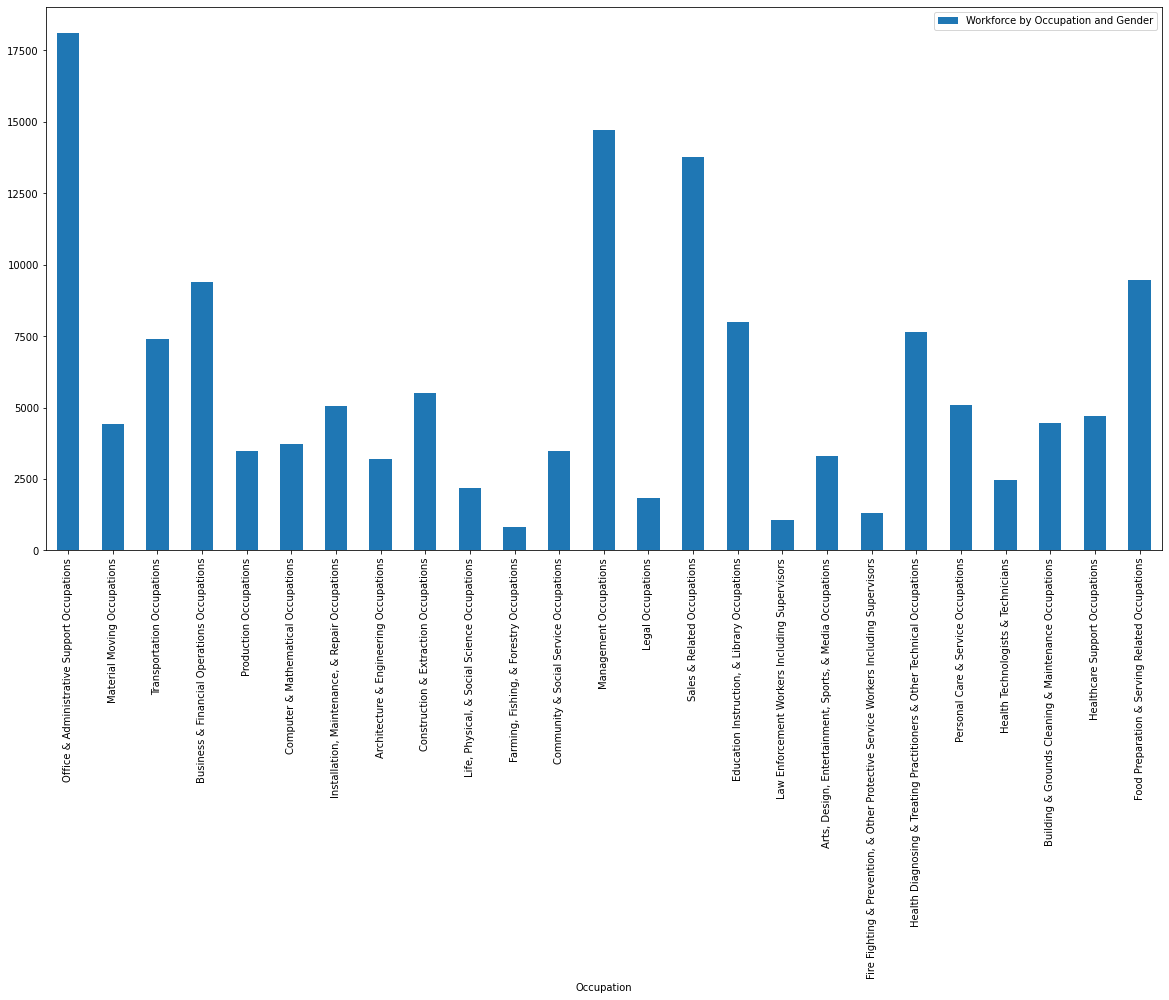

In [178]:
plot = df8.plot.bar(x='Occupation',y='Workforce by Occupation and Gender',figsize=(20, 10))

In [179]:
#Considering the employment by occupation
df71=pd.read_excel('/content/employmentbyoccupation_missoula.xlsx')
df81 = df71[['Occupation','Workforce by Occupation and Gender']]
df81.head()

,Occupation,Workforce by Occupation and Gender
0,"Education Instruction, & Library Occupations",4301
1,Material Moving Occupations,1187
2,Management Occupations,5406
3,Building & Grounds Cleaning & Maintenance Occu...,2488
4,"Fire Fighting & Prevention, & Other Protective...",818


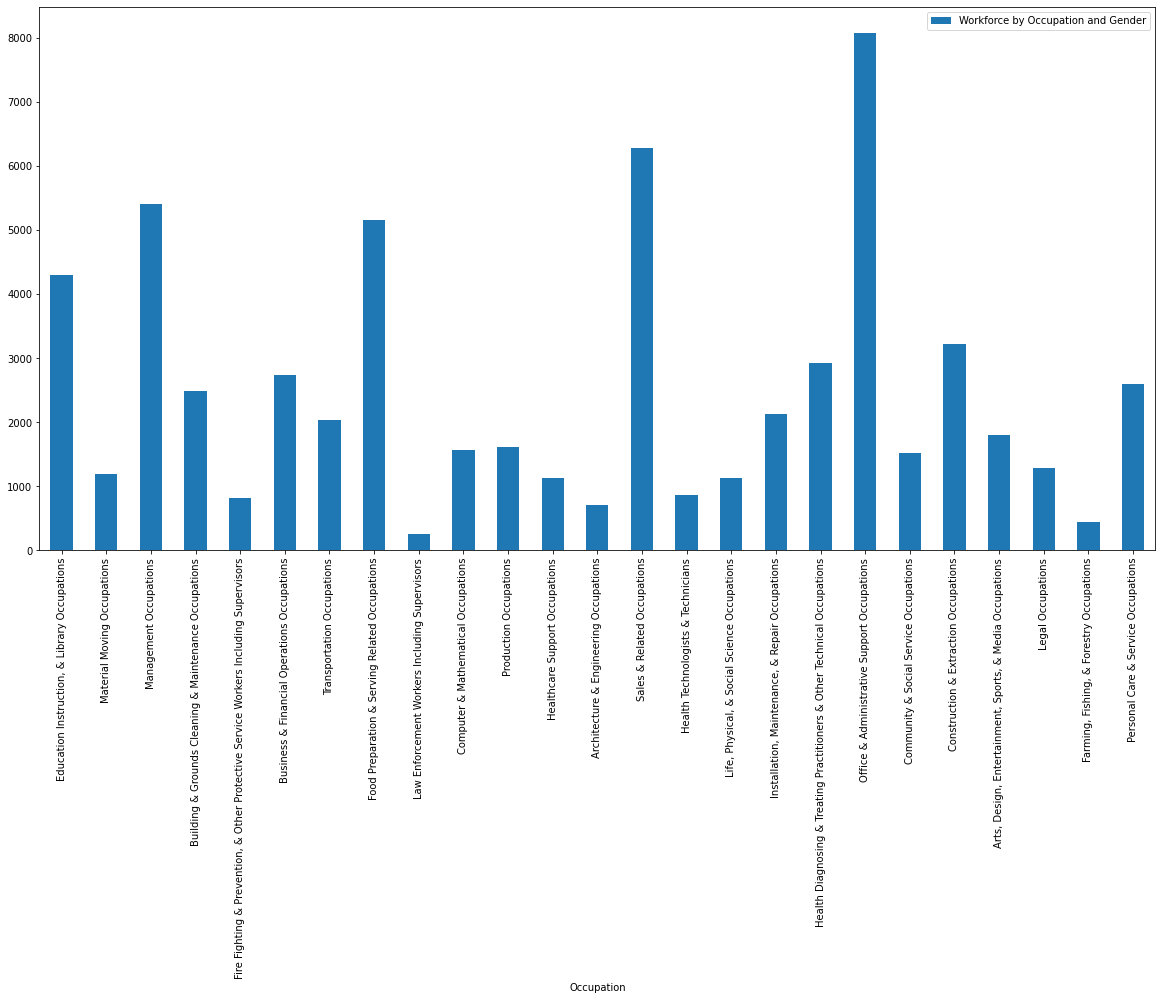

In [180]:
plot = df81.plot.bar(x='Occupation',y='Workforce by Occupation and Gender',figsize=(20, 10))

In [185]:
#Considering employment by industry
df9=pd.read_excel('/content/employmentbyindustry_anchorage.xlsx')
df10 = df9[['Industry','Workforce by Industry and Gender']]
df10.head()

,Industry,Workforce by Industry and Gender
0,Administrative & Support & Waste Management Se...,4234
1,Public Administration,15484
2,"Agriculture, Forestry, Fishing & Hunting",626
3,Accommodation & Food Services,14295
4,"Mining, Quarrying, & Oil & Gas Extraction",2869


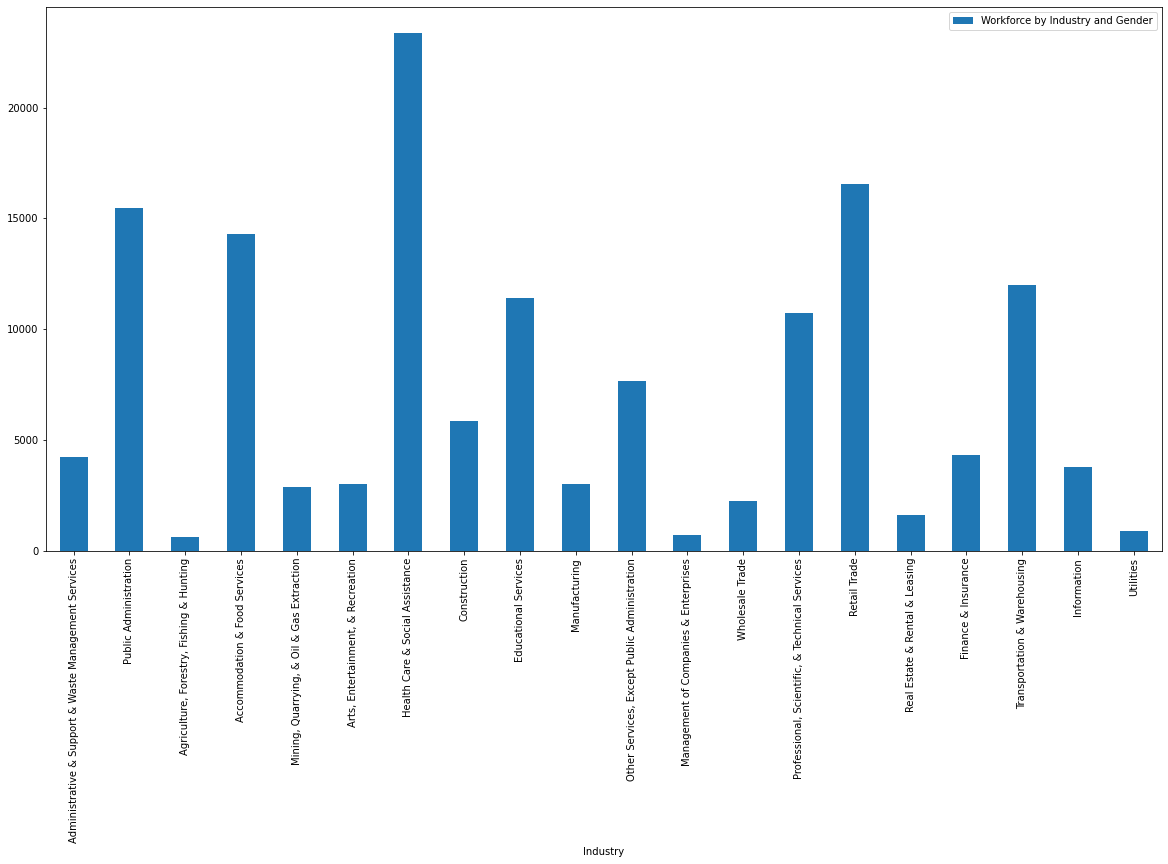

In [184]:
plot = df10.plot.bar(x='Industry',y='Workforce by Industry and Gender',figsize=(20, 10))

In [186]:
df91=pd.read_excel('/content/employmentbyindustry_missoula.xlsx')
df101 = df91[['Industry','Workforce by Industry and Gender']]
df101.head()

,Industry,Workforce by Industry and Gender
0,Educational Services,7115
1,Public Administration,2371
2,"Other Services, Except Public Administration",2766
3,"Mining, Quarrying, & Oil & Gas Extraction",396
4,Accommodation & Food Services,6082


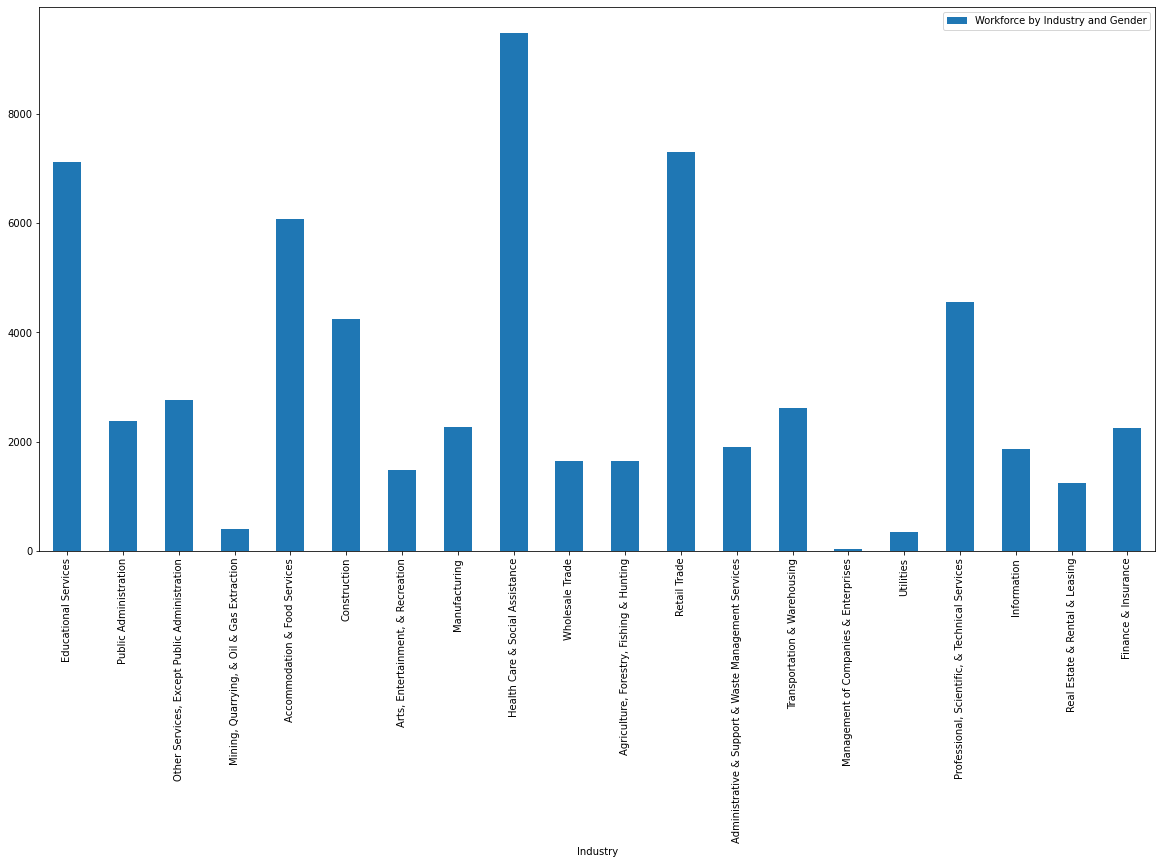

In [187]:
plot = df101.plot.bar(x='Industry',y='Workforce by Industry and Gender',figsize=(20, 10))

In [191]:
#Considering employment for male
df11a=pd.read_excel('/content/employment_anchorage1.xlsx')
df12a = df11a[['Detailed Occupation','Total Population']]
df12a.head()

,Detailed Occupation,Total Population
0,Driver/sales workers & truck drivers,5101
1,"Secretaries and administrative assistants, exc...",1356
2,Cooks,2746
3,Elementary & middle school teachers,2751
4,Other managers,6448


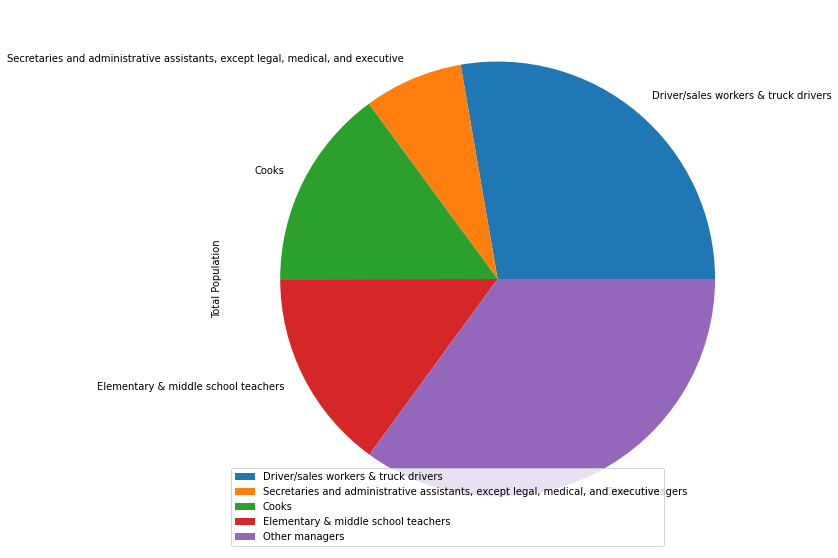

In [192]:
plot = df12a.plot.pie(y='Total Population',labels=df12a['Detailed Occupation'], figsize=(10, 10))

In [198]:
df111a=pd.read_excel('/content/employment_missoula1.xlsx')
df121a = df111a[['Detailed Occupation','Total Population']]
df121a.head()

,Detailed Occupation,Total Population
0,Driver/sales workers & truck drivers,8496
1,Firstline supervisors of retail sales workers,6279
2,Elementary & middle school teachers,2019
3,Miscellaneous managers,6485
4,Secretaries & administrative assistants,442


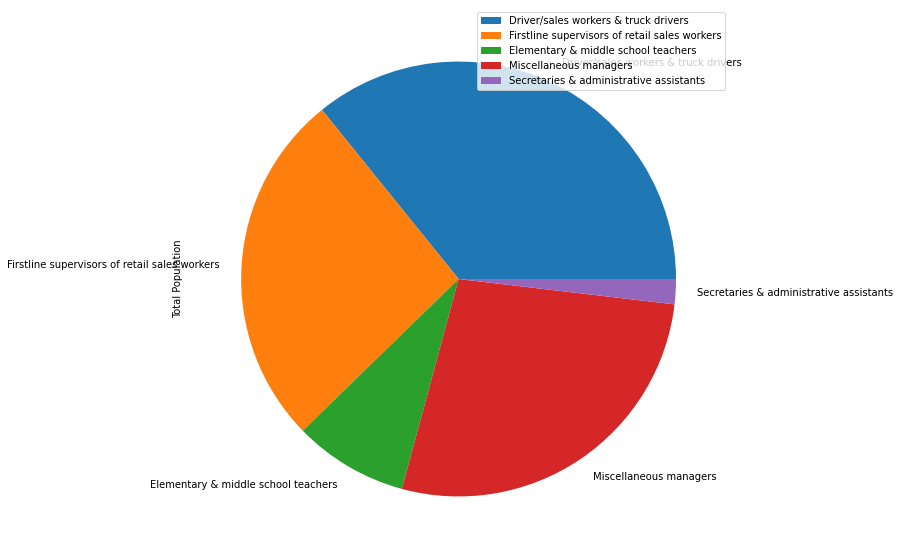

In [200]:
plot = df121a.plot.pie(y='Total Population',labels=df121a['Detailed Occupation'], figsize=(10, 10))

In [201]:
#Considering employment for female
df11b=pd.read_excel('/content/employment_anchorage2.xlsx')
df12b = df11b[['Detailed Occupation','Total Population']]
df12b.head()

,Detailed Occupation,Total Population
0,"Secretaries and administrative assistants, exc...",5327
1,Cooks,2388
2,Elementary & middle school teachers,4617
3,Other managers,3385


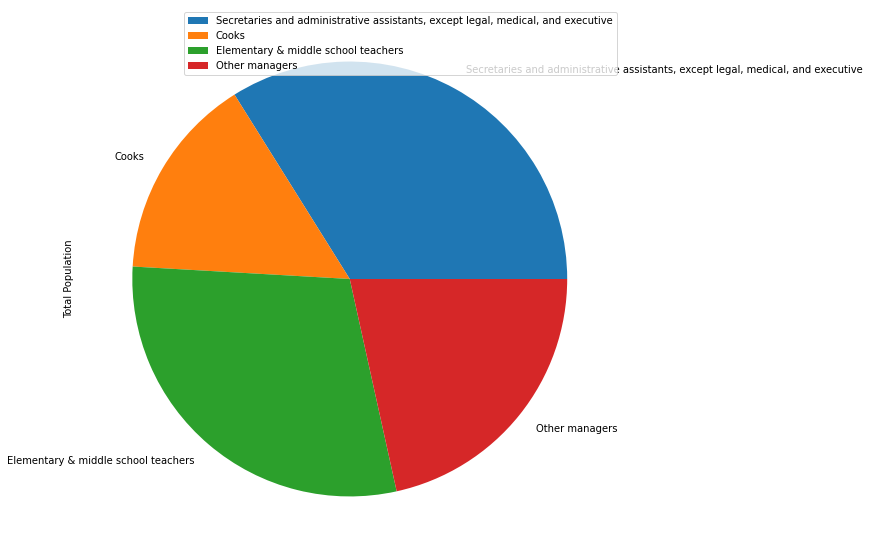

In [202]:
plot = df12b.plot.pie(y='Total Population',labels=df12b['Detailed Occupation'], figsize=(10, 10))

In [203]:
df111b=pd.read_excel('/content/employment_missoula2.xlsx')
df121b = df111b[['Detailed Occupation','Total Population']]
df121b.head()

,Detailed Occupation,Total Population
0,Driver/sales workers & truck drivers,685
1,Elementary & middle school teachers,7708
2,Miscellaneous managers,3757
3,Secretaries & administrative assistants,7775
4,Firstline supervisors of retail sales workers,3731


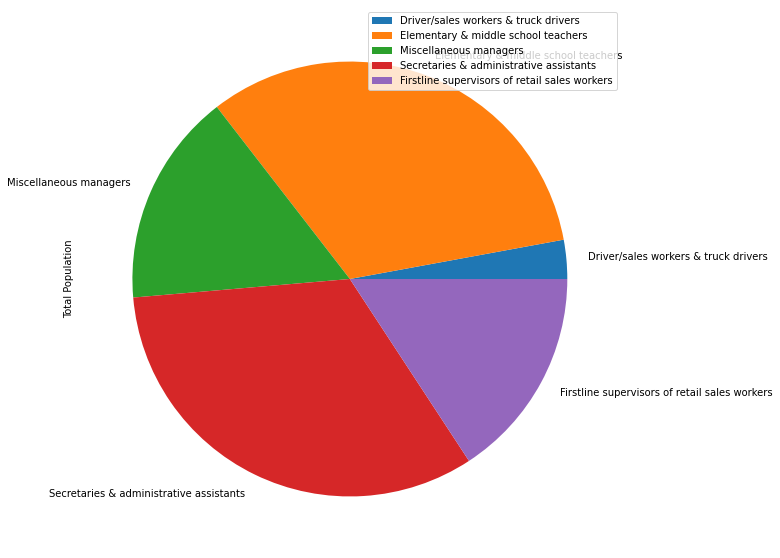

In [204]:
plot = df121b.plot.pie(y='Total Population',labels=df121b['Detailed Occupation'], figsize=(10, 10))

In [205]:
#considering household income
df13=pd.read_excel('/content/anchorage householdincome.xlsx')
df14=df13[['Household Income Bucket','Household']]
df14.head()

,Household Income Bucket,Household
0,"$30,000-$34,999",1916
1,"$200,000+",11881
2,"$125,000-$149,999",7913
3,"$100,000-$124,999",12623
4,"$75,000-$99,999",14662


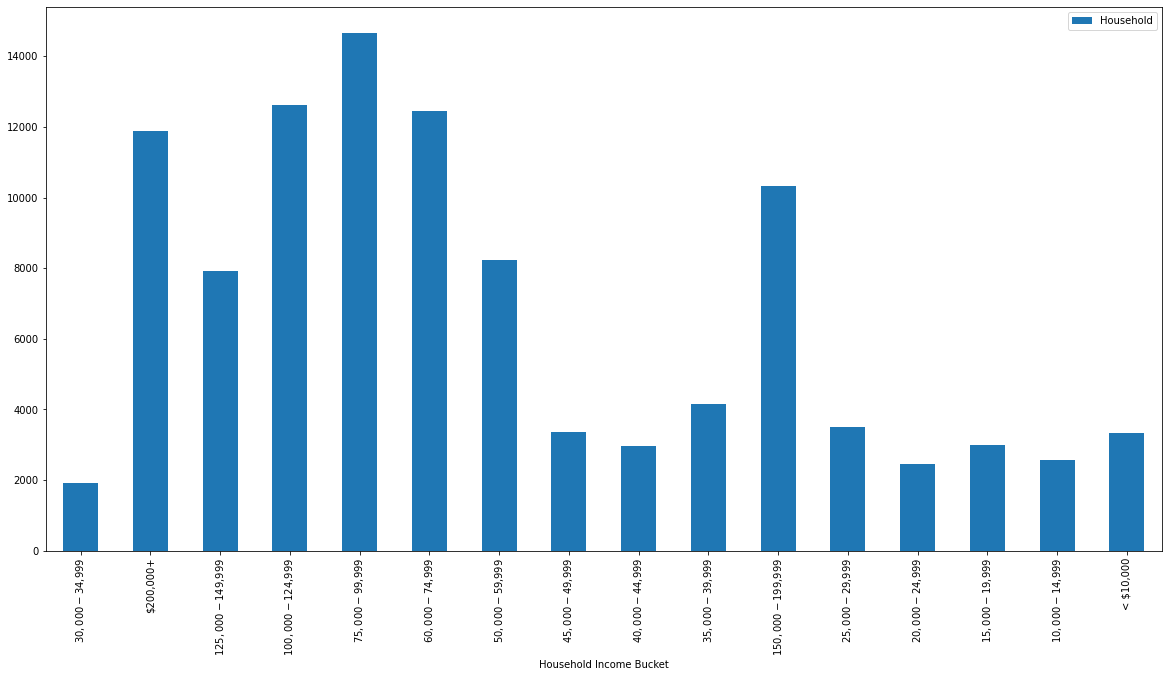

In [207]:
plot = df14.plot.bar(x='Household Income Bucket',y='Household',figsize=(20, 10))

In [212]:
df131=pd.read_excel('/content/missoula householdincome.xlsx')
df141=df131[['Household Income Bucket','Household Income']]
df141.head()

,Household Income Bucket,Household Income
0,"$40,000-$44,999",2596
1,"$200,000+",1895
2,"$150,000-$199,999",1998
3,"$125,000-$149,999",2024
4,"$100,000-$124,999",3519


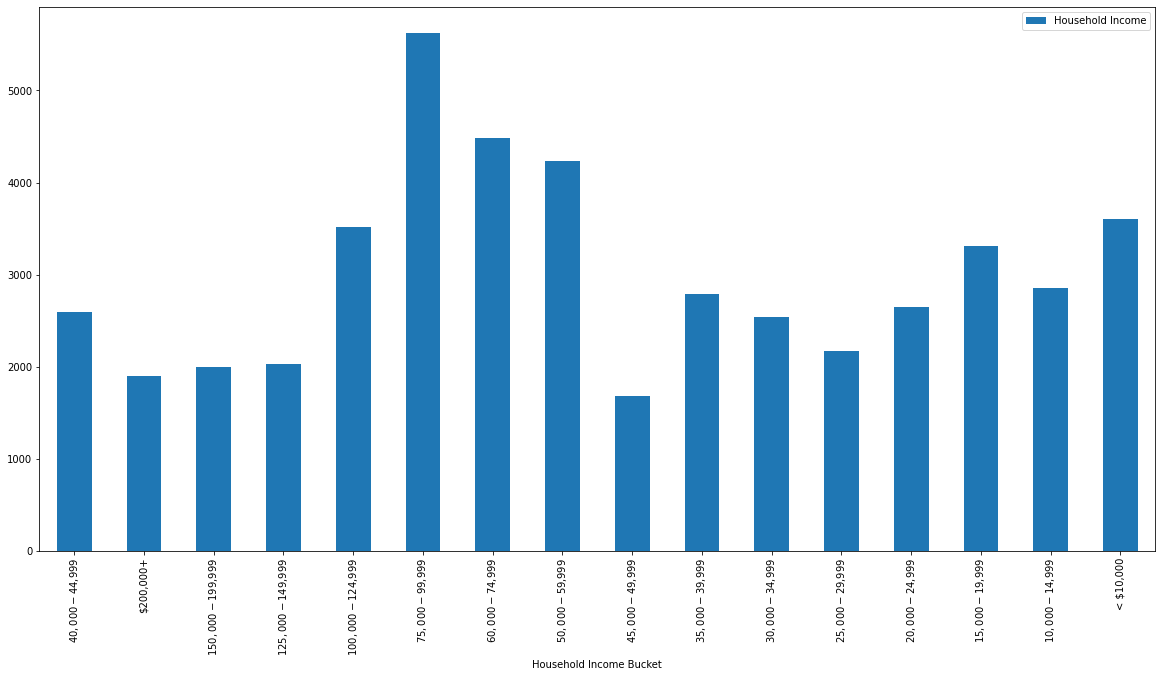

In [213]:
plot = df141.plot.bar(x='Household Income Bucket',y='Household Income',figsize=(20, 10))

In [216]:
#Considering poverty for male
df15a=pd.read_excel('/content/poverty_anchorage1.xlsx')
df16a = df15a[['Age','Poverty Population']]
df16a.head()

,Age,Poverty Population
0,12 to 14 Years,846
1,75 Years & Over,226
2,5 Years,397
3,65 to 74 Years,220
4,6 to 11 Years,1308


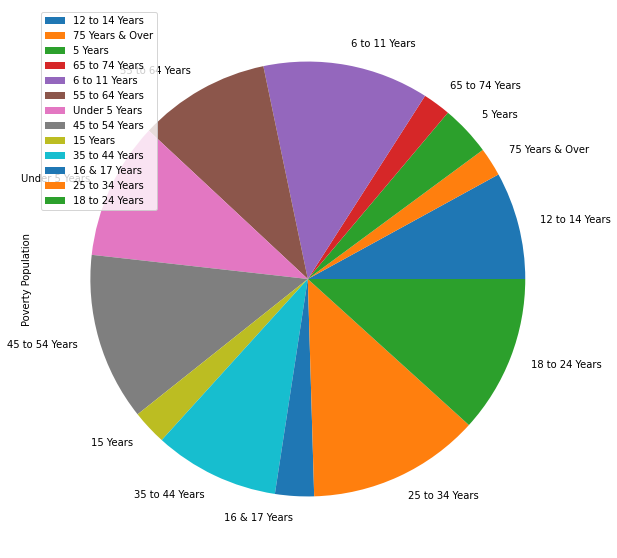

In [217]:
plot = df16a.plot.pie(y='Poverty Population',labels=df16a['Age'], figsize=(10, 10))

In [218]:
df151a=pd.read_excel('/content/poverty_missoula1.xlsx')
df161a = df151a[['Age','Poverty Population']]
df161a.head()

,Age,Poverty Population
0,12 to 14 Years,291
1,75 Years & Over,122
2,5 Years,198
3,65 to 74 Years,269
4,6 to 11 Years,573


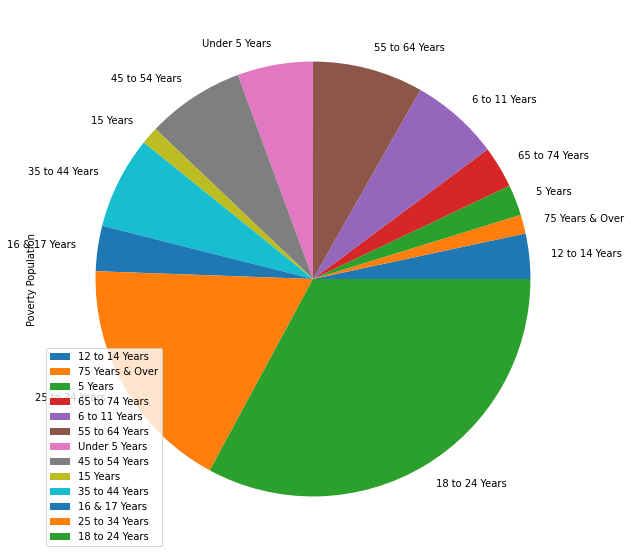

In [219]:
plot = df161a.plot.pie(y='Poverty Population',labels=df161a['Age'], figsize=(10, 10))

In [221]:
#Considering poverty for male
df15b=pd.read_excel('/content/poverty_anchorage2.xlsx')
df16b = df151a[['Age','Poverty Population']]
df16b.head()

,Age,Poverty Population
0,12 to 14 Years,846
1,75 Years & Over,226
2,5 Years,397
3,65 to 74 Years,220
4,6 to 11 Years,1308


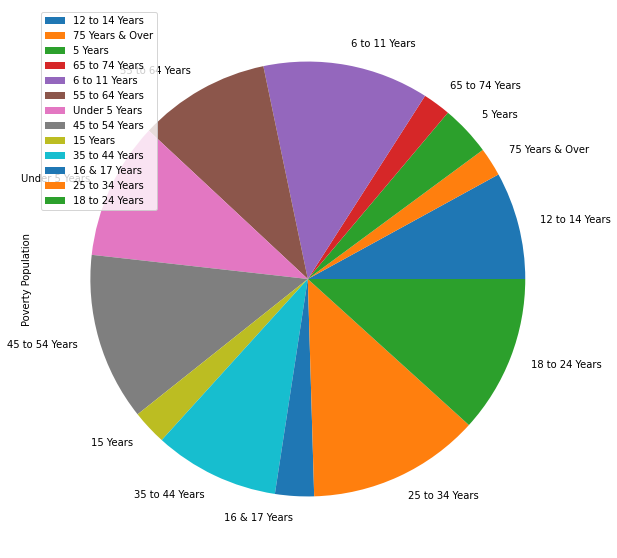

In [224]:
plot = df16b.plot.pie(y='Poverty Population',labels=df16b['Age'], figsize=(10, 10))

In [225]:
df151b=pd.read_excel('/content/poverty_missoula2.xlsx')
df161b = df151b[['Age','Poverty Population']]
df161b.head()

,Age,Poverty Population
0,75 Years & Over,266
1,Under 5 Years,272
2,65 to 74 Years,332
3,5 Years,93
4,55 to 64 Years,740


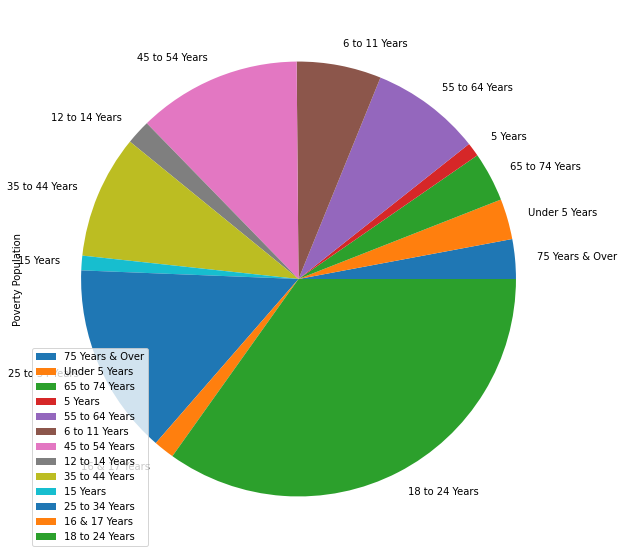

In [226]:
plot = df161b.plot.pie(y='Poverty Population',labels=df161b['Age'], figsize=(10, 10))

In [227]:
df17=pd.read_excel('/content/concentration_anchorage.xlsx')
df17.head()

,Subject,Number of degrees earned
0,Biology,48
1,business,229
2,Communications,19
3,Computer and Information Sciences and Support ...,15
4,Cultural & Gender Studies,1


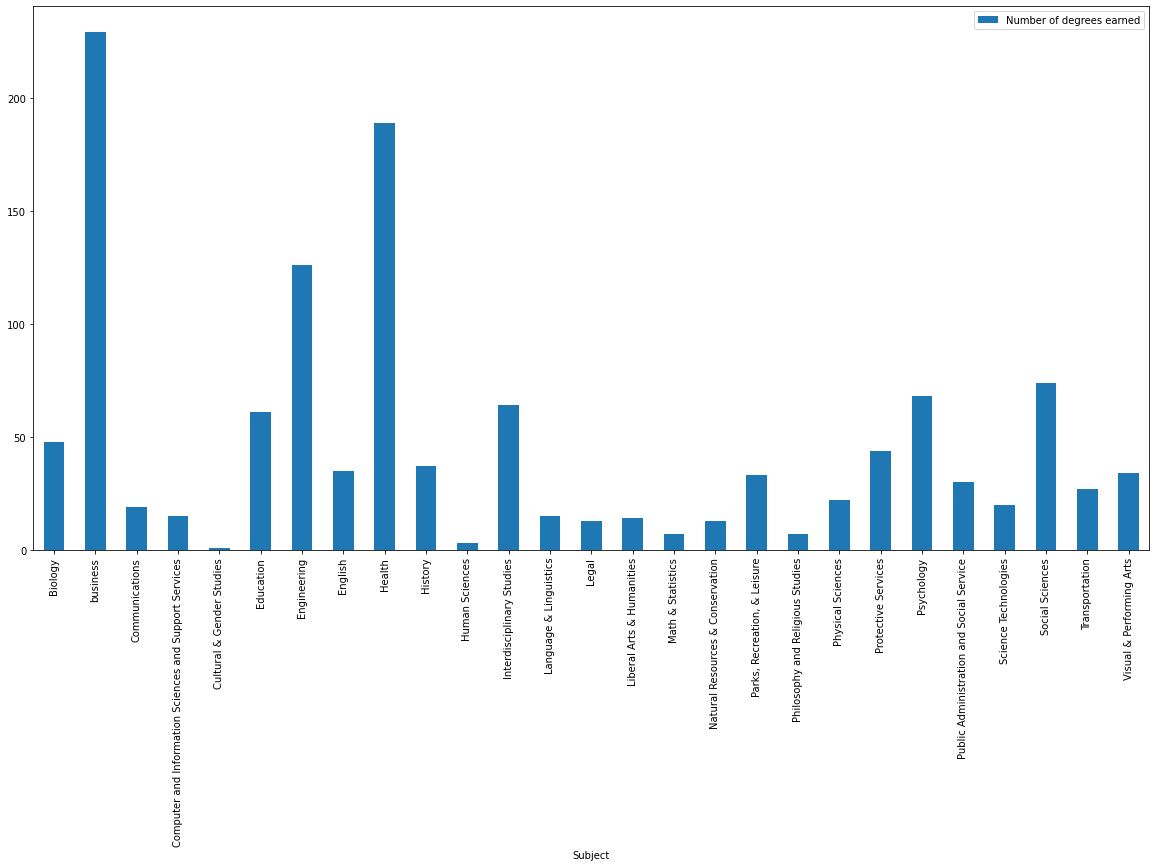

In [228]:
plot = df17.plot.bar(x='Subject',y='Number of degrees earned',figsize=(20, 10))

In [231]:
df18=pd.read_excel('/content/concentration_missoula.xlsx')
df18.head()

,Subject,Number of degrees earned
0,biology,89
1,business,312
2,communication,132
3,Computer and Information Sciences and Support ...,18
4,Cultural & Gender Studies,22


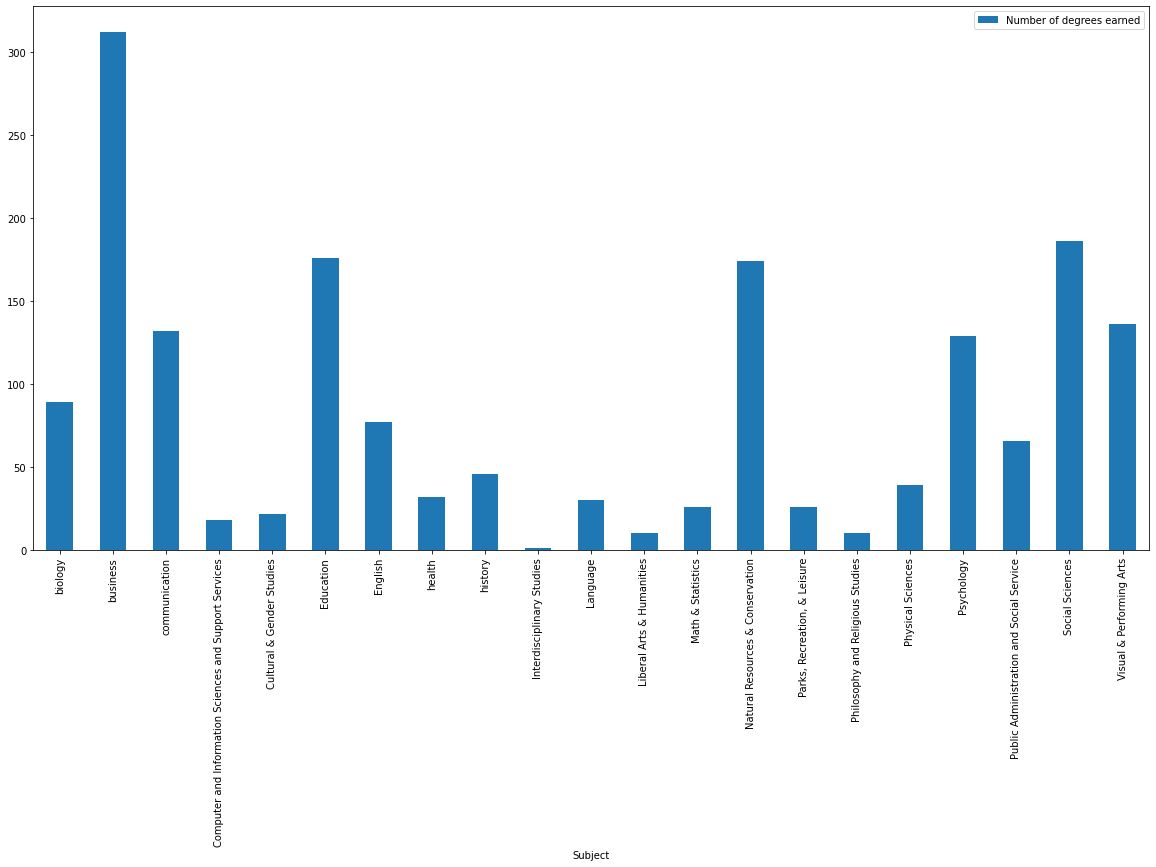

In [232]:
plot = df18.plot.bar(x='Subject',y='Number of degrees earned',figsize=(20, 10))

In [233]:
df19=pd.read_excel('/content/anchorage_regression.xlsx')
df19.head()

,Year,Total workforce,Total crime per 100000,Median Household Income
0,2018,144628,12265.05,81037
1,2017,149198,13106.20,76871
2,2016,153817,11902.49,82203
3,2015,150525,9805.18,78238
4,2014,153137,9253.06,75682


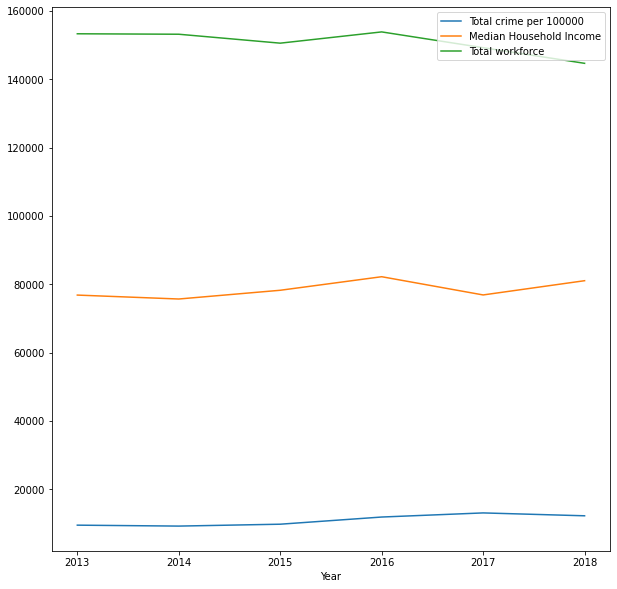

In [236]:
plot = df19.plot.line(x='Year',y=['Total crime per 100000','Median Household Income' ,'Total workforce'],figsize=(10,10))

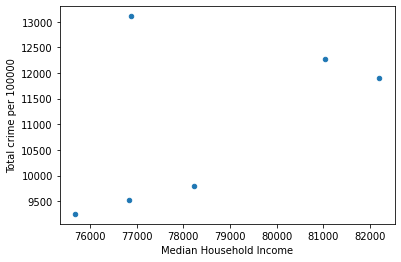

In [237]:
plot1=df19.plot.scatter(x='Median Household Income',y='Total crime per 100000')

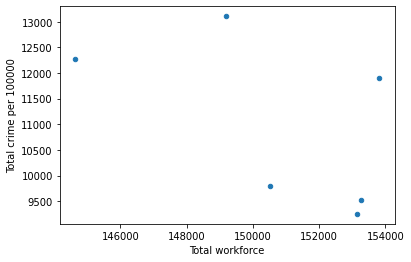

In [238]:
plot1=df19.plot.scatter(x='Total workforce',y='Total crime per 100000')

In [240]:
df20=pd.read_excel('/content/missoula_regression.xlsx')
df20.head()

,Year,Total workforce,Total crime per 100000,Median Household Income,Bacheolor degree completions
0,2017,61644,9981.73,49412,1737
1,2016,60158,11426.39,46371,1746
2,2015,59103,9938.62,46164,1949
3,2014,58050,8803.87,47029,1959
4,2013,57234,8978.32,46117,1917


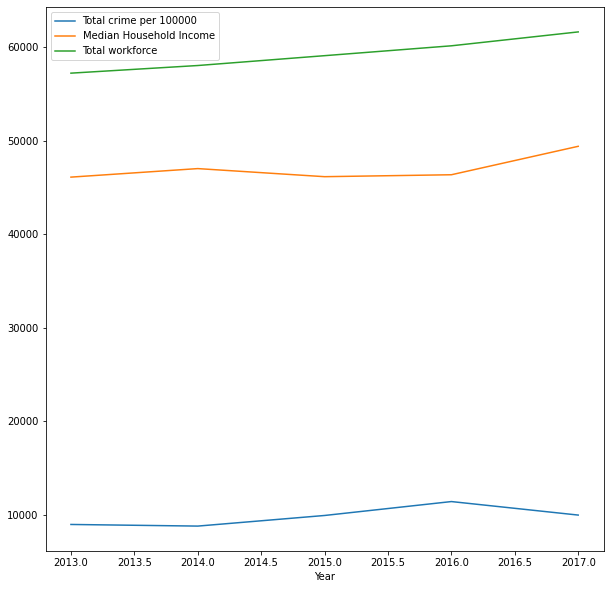

In [241]:
plot = df20.plot.line(x='Year',y=['Total crime per 100000','Median Household Income' ,'Total workforce'],figsize=(10,10))

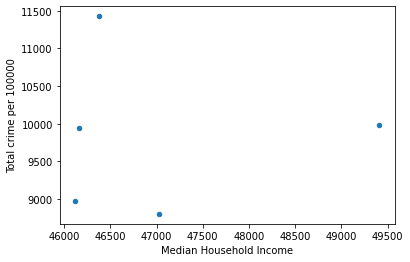

In [242]:
plot1=df20.plot.scatter(x='Median Household Income',y='Total crime per 100000')

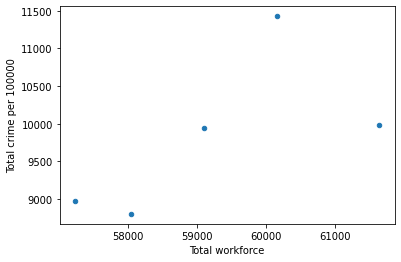

In [243]:
plot1=df20.plot.scatter(x='Total workforce',y='Total crime per 100000')

In [0]:
#Additional implemention of foursquare


In [0]:
address = 'Anchorage, AK'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

In [245]:
search_query = 'university, college'
radius = 1000
print(search_query + ' .... OK!')

university, college .... OK!


In [246]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=R2R0YSHO1JOFIT4RQWSCDAC4HR541Z3ARP5BHVZ1TOI3Z0HL&client_secret=JHAYMIJGHRY4EE2PRGCYLJZKSLITDYORUZWHBYTT13MWII51&ll=61.2163129,-149.8948523&v=20180604&query=university, college&radius=1000&limit=100'

In [247]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5ee884c1d72a4a1a20f185b0'},
 'response': {'venues': [{'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/musicvenue_',
       'suffix': '.png'},
      'id': '4bf58dd8d48988d1e5931735',
      'name': 'Music Venue',
      'pluralName': 'Music Venues',
      'primary': True,
      'shortName': 'Music Venue'}],
    'hasPerk': False,
    'id': '5885b3bf0acb6a3e0e92813d',
    'location': {'cc': 'US',
     'city': 'Anchorage',
     'country': 'United States',
     'distance': 349,
     'formattedAddress': ['Anchorage, AK', 'United States'],
     'labeledLatLngs': [{'label': 'display',
       'lat': 61.21806,
       'lng': -149.90028}],
     'lat': 61.21806,
     'lng': -149.90028,
     'state': 'AK'},
    'name': 'University Of Alaska, Wendy Williamson Auditorium',
    'referralId': 'v-1592296752'}]}}

In [248]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """


,id,name,categories,referralId,hasPerk,location.lat,location.lng,location.labeledLatLngs,location.distance,location.cc,location.city,location.state,location.country,location.formattedAddress
0,5885b3bf0acb6a3e0e92813d,"University Of Alaska, Wendy Williamson Auditorium","[{'id': '4bf58dd8d48988d1e5931735', 'name': 'M...",v-1592296752,False,61.21806,-149.90028,"[{'label': 'display', 'lat': 61.21806, 'lng': ...",349,US,Anchorage,AK,United States,"[Anchorage, AK, United States]"


In [249]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

,name,categories,lat,lng,labeledLatLngs,distance,cc,city,state,country,formattedAddress,id
0,"University Of Alaska, Wendy Williamson Auditorium",Music Venue,61.21806,-149.90028,"[{'label': 'display', 'lat': 61.21806, 'lng': ...",349,US,Anchorage,AK,United States,"[Anchorage, AK, United States]",5885b3bf0acb6a3e0e92813d


In [250]:
dataframe_filtered.name

0    University Of Alaska, Wendy Williamson Auditorium
Name: name, dtype: object

In [251]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around the Conrad Hotel

# add the restaurants as blue circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

In [0]:
address = 'Missoula, MT'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

In [253]:
search_query = 'university,college'
radius = 1000
print(search_query + ' .... OK!')

university,college .... OK!


In [254]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=R2R0YSHO1JOFIT4RQWSCDAC4HR541Z3ARP5BHVZ1TOI3Z0HL&client_secret=JHAYMIJGHRY4EE2PRGCYLJZKSLITDYORUZWHBYTT13MWII51&ll=46.8701049,-113.9952672&v=20180604&query=university,college&radius=1000&limit=100'

In [255]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5ee885439ca1e36a52a39b45'},
 'response': {'venues': [{'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/religious_church_',
       'suffix': '.png'},
      'id': '4bf58dd8d48988d132941735',
      'name': 'Church',
      'pluralName': 'Churches',
      'primary': True,
      'shortName': 'Church'}],
    'hasPerk': False,
    'id': '4ef687bce30093066f7281f7',
    'location': {'address': '435 University Ave',
     'cc': 'US',
     'city': 'Missoula',
     'country': 'United States',
     'distance': 1168,
     'formattedAddress': ['435 University Ave',
      'Missoula, MT 59801',
      'United States'],
     'labeledLatLngs': [{'label': 'display',
       'lat': 46.8598624405006,
       'lng': -113.99193355486308}],
     'lat': 46.8598624405006,
     'lng': -113.99193355486308,
     'postalCode': '59801',
     'state': 'MT'},
    'name': 'University Congregational Church',
    'referralId': 'v-1592296806'},
   {'categor

In [256]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """


,id,name,categories,referralId,hasPerk,location.address,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.city,location.state,location.country,location.formattedAddress,venuePage.id,location.crossStreet
0,4ef687bce30093066f7281f7,University Congregational Church,"[{'id': '4bf58dd8d48988d132941735', 'name': 'C...",v-1592296806,False,435 University Ave,46.859862,-113.991934,"[{'label': 'display', 'lat': 46.8598624405006,...",1168,59801,US,Missoula,MT,United States,"[435 University Ave, Missoula, MT 59801, Unite...",NaN,NaN
1,4c8aa79e6418a14306d9e1ce,"University of montana, curry health",[],v-1592296806,False,NaN,46.870588,-113.986337,"[{'label': 'display', 'lat': 46.870588, 'lng':...",681,59802,US,Missoula,MT,United States,"[Missoula, MT 59802, United States]",NaN,NaN
2,4b0abb9df964a5200d2723e3,University of Montana,"[{'id': '4bf58dd8d48988d1ae941735', 'name': 'U...",v-1592296806,False,32 Campus Dr,46.861585,-113.986961,"[{'label': 'display', 'lat': 46.8615848861621,...",1139,59801,US,Missoula,MT,United States,"[32 Campus Dr, Missoula, MT 59801, United States]",95724433,NaN
3,4e269175d16486291ba1655a,University Recording Studio,"[{'id': '4bf58dd8d48988d199941735', 'name': 'C...",v-1592296806,False,NaN,46.862988,-113.986617,"[{'label': 'display', 'lat': 46.86298770212387...",1030,59802,US,Missoula,MT,United States,"[Missoula, MT 59802, United States]",NaN,NaN
4,4beda431e3562d7f8754fff8,University Theatre,"[{'id': '4bf58dd8d48988d1ac941735', 'name': 'C...",v-1592296806,False,NaN,46.861937,-113.986316,"[{'label': 'display', 'lat': 46.86193695047117...",1136,NaN,US,NaN,Montana,United States,"[Montana, United States]",NaN,NaN


In [257]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

,name,categories,address,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,crossStreet,id
0,University Congregational Church,Church,435 University Ave,46.859862,-113.991934,"[{'label': 'display', 'lat': 46.8598624405006,...",1168,59801,US,Missoula,MT,United States,"[435 University Ave, Missoula, MT 59801, Unite...",NaN,4ef687bce30093066f7281f7
1,"University of montana, curry health",None,NaN,46.870588,-113.986337,"[{'label': 'display', 'lat': 46.870588, 'lng':...",681,59802,US,Missoula,MT,United States,"[Missoula, MT 59802, United States]",NaN,4c8aa79e6418a14306d9e1ce
2,University of Montana,University,32 Campus Dr,46.861585,-113.986961,"[{'label': 'display', 'lat': 46.8615848861621,...",1139,59801,US,Missoula,MT,United States,"[32 Campus Dr, Missoula, MT 59801, United States]",NaN,4b0abb9df964a5200d2723e3
3,University Recording Studio,College Arts Building,NaN,46.862988,-113.986617,"[{'label': 'display', 'lat': 46.86298770212387...",1030,59802,US,Missoula,MT,United States,"[Missoula, MT 59802, United States]",NaN,4e269175d16486291ba1655a
4,University Theatre,College Theater,NaN,46.861937,-113.986316,"[{'label': 'display', 'lat': 46.86193695047117...",1136,NaN,US,NaN,Montana,United States,"[Montana, United States]",NaN,4beda431e3562d7f8754fff8
5,University of Montana - School of Law,Law School,Campus Drive,46.863194,-113.986146,"[{'label': 'display', 'lat': 46.86319362845856...",1036,NaN,US,Missoula,MT,United States,"[Campus Drive, Missoula, MT, United States]",NaN,4e627da2b3ad629a3a738487
6,Days Inn Missoula University,Hotel,201 East Main St.,46.870333,-113.992996,"[{'label': 'display', 'lat': 46.870333, 'lng':...",174,59802,US,Missoula,MT,United States,"[201 East Main St., Missoula, MT 59802, United...",NaN,4c6a1d531a6620a1ef74658c
7,Motel 6,Hotel,630 E Broadway St,46.870295,-113.985840,"[{'label': 'display', 'lat': 46.87029484467405...",717,59802,US,Missoula,MT,United States,"[630 E Broadway St, Missoula, MT 59802, United...",NaN,4bd7be7809ecb7133099477c
8,Associated Students of the University of Montana,Student Center,32 Campus Drive,46.861396,-113.989253,"[{'label': 'display', 'lat': 46.8613957159714,...",1072,59812,US,Missoula,MT,United States,"[32 Campus Drive, Missoula, MT 59812, United S...",NaN,51a95a92498eedaf0bab07f5
9,Sigma Chi Fraternity - University of Montana,Fraternity House,1110 Gerald Ave,46.860687,-113.995063,"[{'label': 'display', 'lat': 46.86068711617314...",1048,59801,US,Missoula,MT,United States,"[1110 Gerald Ave (Daly), Missoula, MT 59801, U...",Daly,4ed5db53775ba3c06492033a


In [258]:
dataframe_filtered.name

0                     University Congregational Church
1                  University of montana, curry health
2                                University of Montana
3                          University Recording Studio
4                                   University Theatre
5                University of Montana - School of Law
6                         Days Inn Missoula University
7                                              Motel 6
8     Associated Students of the University of Montana
9         Sigma Chi Fraternity - University of Montana
10                                 The Montana Theater
11                                           Pizza Hut
12                   Corbin Hall University Of Montana
13                                  Adams Event Center
14                  U of M Gallagher Business Building
Name: name, dtype: object

In [259]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around the Conrad Hotel

# add the restaurants as blue circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

So, Missoula seems to have more colleges compared to Anchorage